In [1]:
#mpls_1 and mpls_2 from Mpls Weather Bureau downtown (44.98333, -93.3), elevation ?, near Prince's childhood
# home / Olsen Memorial highway / statue
#msp_1, msp_2, msp_3, msp_4 from MSP Airport (44.88523, -93.23133), elevation 254.5m
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
mpls_01_30 = pd.read_csv('Downloads/mpls_1.csv')
mpls_31_48 = pd.read_csv('Downloads/mpls_2.csv')
msp_39_50 = pd.read_csv('Downloads/msp_1.csv')
msp_51_70 = pd.read_csv('Downloads/msp_2.csv')
msp_71_00 = pd.read_csv('Downloads/msp_3.csv')
msp_01_23 = pd.read_csv('Downloads/msp_4.csv')

In [2]:
mpls_01_48 = pd.concat([mpls_01_30, mpls_31_48], axis=0).reset_index()
mpls_01_48.head()

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TMAX,TMIN
0,0,USC00215433,"MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US",44.98333,-93.3,NaN,1901-01-01,-12.2,-20.0
1,1,USC00215433,"MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US",44.98333,-93.3,NaN,1901-01-02,-15.6,-25.0
2,2,USC00215433,"MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US",44.98333,-93.3,NaN,1901-01-03,-2.8,-15.6
3,3,USC00215433,"MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US",44.98333,-93.3,NaN,1901-01-04,-8.3,-12.8
4,4,USC00215433,"MINNEAPOLIS WEATHER BUREAU DOWNTOWN, MN US",44.98333,-93.3,NaN,1901-01-05,-6.1,-16.7


In [3]:
mpls_01_48 = mpls_01_48.drop(mpls_01_48.columns[[1, 2, 3, 4, 5]], axis=1)

In [4]:
mpls_01_48.columns = mpls_01_48.columns.str.lower()
mpls_01_48['tmax'].ffill(axis=0, inplace=True)
print(mpls_01_48.head())
print(mpls_01_48.info())

   index        date  tmax  tmin
0      0  1901-01-01 -12.2 -20.0
1      1  1901-01-02 -15.6 -25.0
2      2  1901-01-03  -2.8 -15.6
3      3  1901-01-04  -8.3 -12.8
4      4  1901-01-05  -6.1 -16.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17084 entries, 0 to 17083
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   17084 non-null  int64  
 1   date    17084 non-null  object 
 2   tmax    17084 non-null  float64
 3   tmin    17084 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 534.0+ KB
None


In [5]:
null_tmax = mpls_01_48[mpls_01_48['tmax'].isnull()].index.tolist()
print("tmax null at lines " + str(null_tmax))
null_tmin = mpls_01_48[mpls_01_48['tmin'].isnull()].index.tolist()
print("tmin null at lines " + str(null_tmin))

tmax null at lines []
tmin null at lines []


In [6]:
msp_39_23 = pd.concat([msp_39_50, msp_51_70, msp_71_00, msp_01_23], axis=0).reset_index()

In [7]:
msp_39_23 = msp_39_23.drop(msp_39_23.columns[[1, 2, 3, 4, 5, 7]], axis=1)
msp_39_23.head()

,index,DATE,TMAX,TMIN
0,0,1939-01-01,1.1,-13.9
1,1,1939-01-02,-3.9,-8.9
2,2,1939-01-03,-1.7,-6.1
3,3,1939-01-04,1.1,-2.8
4,4,1939-01-05,1.1,-5.6


In [8]:
msp_39_23.columns = msp_39_23.columns.str.lower()
msp_39_23['tmin'].ffill(axis=0, inplace=True)

In [9]:
null_tmax = msp_39_23[msp_39_23['tmax'].isnull()].index.tolist()
print("tmax null at lines " + str(null_tmax))
null_tmin = msp_39_23[msp_39_23['tmin'].isnull()].index.tolist()
print("tmin null at lines " + str(null_tmin))

tmax null at lines []
tmin null at lines []


In [10]:
#Calculate midpoint temperature for each day in both datasets
mpls_01_48['tmid'] = (mpls_01_48['tmax'] + mpls_01_48['tmin']) / 2
msp_39_23['tmid'] = (msp_39_23['tmax'] + msp_39_23['tmin']) / 2

In [11]:
#Convert all temps from deg. C to deg. F
mpls_01_48['tmax'] = mpls_01_48['tmax'] * 1.8 + 32
mpls_01_48['tmin'] = mpls_01_48['tmin'] * 1.8 + 32
mpls_01_48['tmid'] = mpls_01_48['tmid'] * 1.8 + 32
msp_39_23['tmax'] = msp_39_23['tmax'] * 1.8 + 32
msp_39_23['tmin'] = msp_39_23['tmin'] * 1.8 + 32
msp_39_23['tmid'] = msp_39_23['tmid'] * 1.8 + 32

In [12]:
#Add year, month, and day columns
mpls_01_48['year'] = pd.to_datetime(mpls_01_48['date']).dt.year
mpls_01_48['month'] = pd.to_datetime(mpls_01_48['date']).dt.month
mpls_01_48['day'] = pd.to_datetime(mpls_01_48['date']).dt.day

msp_39_23['year'] = pd.to_datetime(msp_39_23['date']).dt.year
msp_39_23['month'] = pd.to_datetime(msp_39_23['date']).dt.month
msp_39_23['day'] = pd.to_datetime(msp_39_23['date']).dt.day

In [13]:
mpls_01_48.head()

,index,date,tmax,tmin,tmid,year,month,day
0,0,1901-01-01,10.04,-4.00,3.02,1901,1,1
1,1,1901-01-02,3.92,-13.00,-4.54,1901,1,2
2,2,1901-01-03,26.96,3.92,15.44,1901,1,3
3,3,1901-01-04,17.06,8.96,13.01,1901,1,4
4,4,1901-01-05,21.02,1.94,11.48,1901,1,5


In [14]:
msp_39_23.head()

,index,date,tmax,tmin,tmid,year,month,day
0,0,1939-01-01,33.98,6.98,20.48,1939,1,1
1,1,1939-01-02,24.98,15.98,20.48,1939,1,2
2,2,1939-01-03,28.94,21.02,24.98,1939,1,3
3,3,1939-01-04,33.98,26.96,30.47,1939,1,4
4,4,1939-01-05,33.98,21.92,27.95,1939,1,5


In [15]:
mpls_city_40_48 = mpls_01_48[mpls_01_48.year > 1939].reset_index()
mpls_city_40_48.head()

,level_0,index,date,tmax,tmin,tmid,year,month,day
0,13796,2839,1940-01-01,6.98,-4.00,1.49,1940,1,1
1,13797,2840,1940-01-02,8.96,-4.00,2.48,1940,1,2
2,13798,2841,1940-01-03,8.96,-0.94,4.01,1940,1,3
3,13799,2842,1940-01-04,-4.00,-9.04,-6.52,1940,1,4
4,13800,2843,1940-01-05,10.04,-9.94,0.05,1940,1,5


In [16]:
mpls_city_40_48 = mpls_city_40_48.drop(mpls_city_40_48.columns[[0, 1, 2]], axis=1)
mpls_city_40_48.insert(0, 'station', 'City')
mpls_city_40_48.head()

,station,tmax,tmin,tmid,year,month,day
0,City,6.98,-4.00,1.49,1940,1,1
1,City,8.96,-4.00,2.48,1940,1,2
2,City,8.96,-0.94,4.01,1940,1,3
3,City,-4.00,-9.04,-6.52,1940,1,4
4,City,10.04,-9.94,0.05,1940,1,5


In [17]:
mpls_city_40_48_yearly = mpls_city_40_48.groupby(mpls_city_40_48["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean'})
mpls_city_40_48_yearly

,year,tmax,tmin,tmid
year,,,,
1940,1940.0,52.542131,36.096721,44.319426
1941,1941.0,55.814247,38.879452,47.346849
1942,1942.0,54.080329,37.664822,45.872575
1943,1943.0,52.560932,35.128055,43.844493
1944,1944.0,54.803443,38.303443,46.553443
1945,1945.0,52.165425,35.193151,43.679288
1946,1946.0,55.479890,37.187452,46.333671
1947,1947.0,53.986630,37.098192,45.542411
1948,1948.0,54.908197,36.562951,45.735574


mpls_city_40_48.head()

In [133]:
#city_column_mapper = {'date':'city_date', 'tmax':'city_tmax', 'tmin':'city_tmin', 'tmid':'city_tmid'}
#mpls_city_40_48 = mpls_city_40_48.rename(mapper=city_column_mapper, axis=1)

In [18]:
msp_air_40_48 = msp_39_23[msp_39_23.year < 1949].reset_index()
msp_air_40_48 = msp_air_40_48[365:]
msp_air_40_48.head()

,level_0,index,date,tmax,tmin,tmid,year,month,day
365,365,365,1940-01-01,6.98,-2.92,2.03,1940,1,1
366,366,366,1940-01-02,8.96,-2.92,3.02,1940,1,2
367,367,367,1940-01-03,10.04,-5.08,2.48,1940,1,3
368,368,368,1940-01-04,-2.92,-7.96,-5.44,1940,1,4
369,369,369,1940-01-05,10.04,-7.06,1.49,1940,1,5


In [19]:
msp_air_40_48 = msp_air_40_48.drop(msp_air_40_48.columns[[0, 1, 2]], axis=1)
msp_air_40_48.insert(0, 'station', 'Airport')
msp_air_40_48.head()

,station,tmax,tmin,tmid,year,month,day
365,Airport,6.98,-2.92,2.03,1940,1,1
366,Airport,8.96,-2.92,3.02,1940,1,2
367,Airport,10.04,-5.08,2.48,1940,1,3
368,Airport,-2.92,-7.96,-5.44,1940,1,4
369,Airport,10.04,-7.06,1.49,1940,1,5


In [20]:
msp_air_40_48_yearly = msp_air_40_48.groupby(msp_air_40_48["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean'})
msp_air_40_48_yearly

,year,tmax,tmin,tmid
year,,,,
1940,1940.0,53.252295,35.408197,44.330246
1941,1941.0,56.885863,38.386301,47.636082
1942,1942.0,54.960110,37.078466,46.019288
1943,1943.0,53.374137,34.620110,43.997123
1944,1944.0,55.547049,38.081148,46.814098
1945,1945.0,52.957425,34.485479,43.721452
1946,1946.0,56.178685,36.632164,46.405425
1947,1947.0,54.577918,36.412219,45.495068
1948,1948.0,55.973443,35.930984,45.952213


In [21]:
city_tmax = mpls_city_40_48_yearly['tmax']
air_tmax = msp_air_40_48_yearly['tmax']
tmax_diff = air_tmax - city_tmax
tmax_diff_mean = tmax_diff.mean()
print('On average T-max at the airport was ' + str(round(tmax_diff_mean, 2)) 
      + ' deg. F higher than at the city station')

from scipy.stats import ttest_ind
tstat,pval = ttest_ind(tmax_diff, 0)
print('The p-value is ' + str(round(pval, 4)) + ' so the difference is ')
if pval <= 0.05:
    print('Significant')
else:
    print('Not significant')


On average T-max at the airport was 0.82 deg. F higher than at the city station
The p-value is 0.0014 so the difference is 
Significant


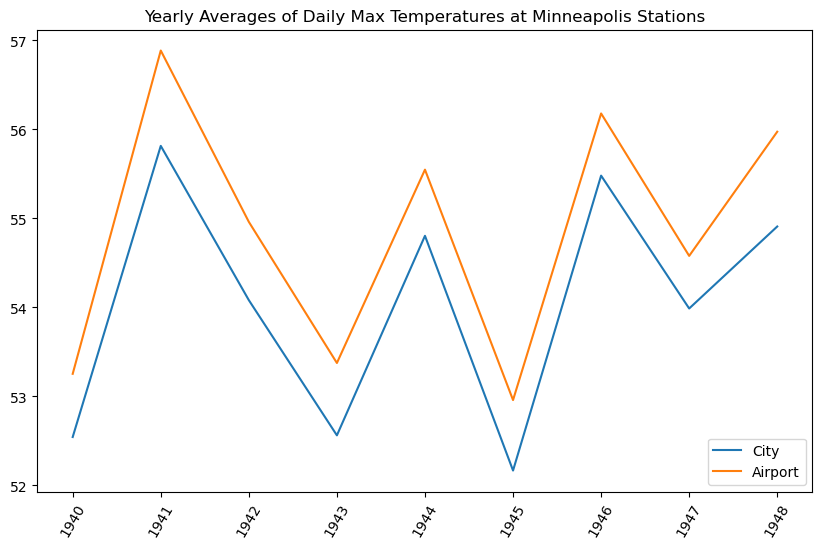

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize = (10,6))
plt.plot(mpls_city_40_48_yearly['year'], mpls_city_40_48_yearly['tmax'])
plt.plot(msp_air_40_48_yearly['year'], msp_air_40_48_yearly['tmax'])
plt.legend(["City", "Airport"], loc="lower right")
plt.title("Yearly Averages of Daily Max Temperatures at Minneapolis Stations")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [23]:
city_tmid = mpls_city_40_48_yearly['tmid']
air_tmid = msp_air_40_48_yearly['tmid']
tmid_diff = air_tmid - city_tmid
tmid_diff_mean = tmid_diff.mean()
print('On average T-mid at the airport was ' + str(round(tmid_diff_mean, 2)) 
      + ' deg. F higher than at the city station')

tstat,pval = ttest_ind(tmid_diff, 0)
print('The p-value is ' + str(round(pval, 4)) + ' so the difference is ')
if pval <= 0.05:
    print('Significant')
else:
    print('Not significant')

On average T-mid at the airport was 0.13 deg. F higher than at the city station
The p-value is 0.3287 so the difference is 
Not significant


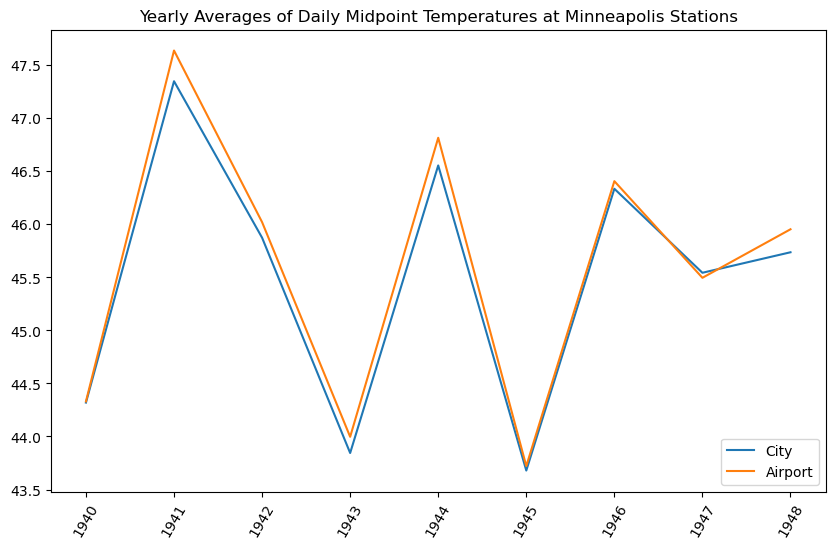

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize = (10,6))
plt.plot(mpls_city_40_48_yearly['year'], mpls_city_40_48_yearly['tmid'])
plt.plot(msp_air_40_48_yearly['year'], msp_air_40_48_yearly['tmid'])
plt.legend(["City", "Airport"], loc="lower right")
plt.title("Yearly Averages of Daily Midpoint Temperatures at Minneapolis Stations")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [25]:
city_tmin = mpls_city_40_48_yearly['tmin']
air_tmin = msp_air_40_48_yearly['tmin']
tmin_diff = air_tmin - city_tmin
tmin_diff_mean = tmin_diff.mean()
print('On average T-min at the airport was ' + str(round(tmin_diff_mean, 2)) 
      + ' deg. F higher than at the city station')

tstat,pval = ttest_ind(tmin_diff, 0)
print('The p-value is ' + str(round(pval, 4)) + ' so the difference is ')
if pval <= 0.05:
    print('Significant')
else:
    print('Not significant')

On average T-min at the airport was -0.56 deg. F higher than at the city station
The p-value is 0.0074 so the difference is 
Significant


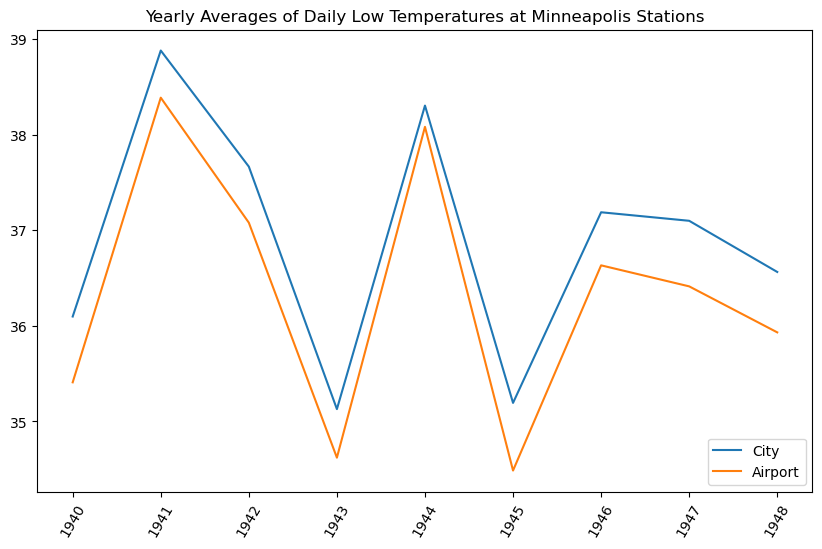

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize = (10,6))
plt.plot(mpls_city_40_48_yearly['year'], mpls_city_40_48_yearly['tmin'])
plt.plot(msp_air_40_48_yearly['year'], msp_air_40_48_yearly['tmin'])
plt.legend(["City", "Airport"], loc="lower right")
plt.title("Yearly Averages of Daily Low Temperatures at Minneapolis Stations")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [27]:
tmax_diff = msp_air_40_48_yearly.tmax.mean() - mpls_city_40_48_yearly.tmax.mean()
tmid_diff = msp_air_40_48_yearly.tmid.mean() - mpls_city_40_48_yearly.tmid.mean()
tmin_diff = - msp_air_40_48_yearly.tmin.mean() + mpls_city_40_48_yearly.tmin.mean()

print('T-Max at Airport station was an average of ' + str(round(tmax_diff, 2)) + ' deg. F warmer than City station')
print('T-Mid at Airport station was an average of ' + str(round(tmid_diff, 2)) + ' deg. F warmer than City station')
print('T-Min at Airport station was an average of ' + str(round(tmin_diff, 2)) + ' deg. F cooler than City station')
print('The differences in T-Max and T-Min were largest during the summer months, especially July and August')
print('Any analysis using data from both stations should only involve Tmid, not Tmax or Tmin')

T-Max at Airport station was an average of 0.82 deg. F warmer than City station
T-Mid at Airport station was an average of 0.13 deg. F warmer than City station
T-Min at Airport station was an average of 0.56 deg. F cooler than City station
The differences in T-Max and T-Min were largest during the summer months, especially July and August
Any analysis using data from both stations should only involve Tmid, not Tmax or Tmin


In [28]:
mpls_city_40_48_monthly = mpls_city_40_48.groupby(mpls_city_40_48["month"]).agg({'month':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean'})
mpls_city_40_48_monthly

,month,tmax,tmin,tmid
month,,,,
1,1.0,23.456129,7.063871,15.260000
2,2.0,25.623765,7.935059,16.779412
3,3.0,37.921935,21.635484,29.778710
4,4.0,55.854000,37.346667,46.600333
5,5.0,66.177419,47.534839,56.856129
6,6.0,76.035333,58.484000,67.259667
7,7.0,82.870968,64.429677,73.650323
8,8.0,80.863871,62.988387,71.926129
9,9.0,71.082667,52.764000,61.923333


In [29]:
msp_air_40_48_monthly = msp_air_40_48.groupby(msp_air_40_48["month"]).agg({'month':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean'})
msp_air_40_48_monthly

,month,tmax,tmin,tmid
month,,,,
1,1.0,23.936129,6.736129,15.336129
2,2.0,26.569647,8.508235,17.538941
3,3.0,38.836129,22.497419,30.666774
4,4.0,56.912000,37.104667,47.008333
5,5.0,67.214839,46.719355,56.967097
6,6.0,76.697333,57.594000,67.145667
7,7.0,83.702581,62.914194,73.308387
8,8.0,81.840000,61.730968,71.785484
9,9.0,72.059333,51.620667,61.840000


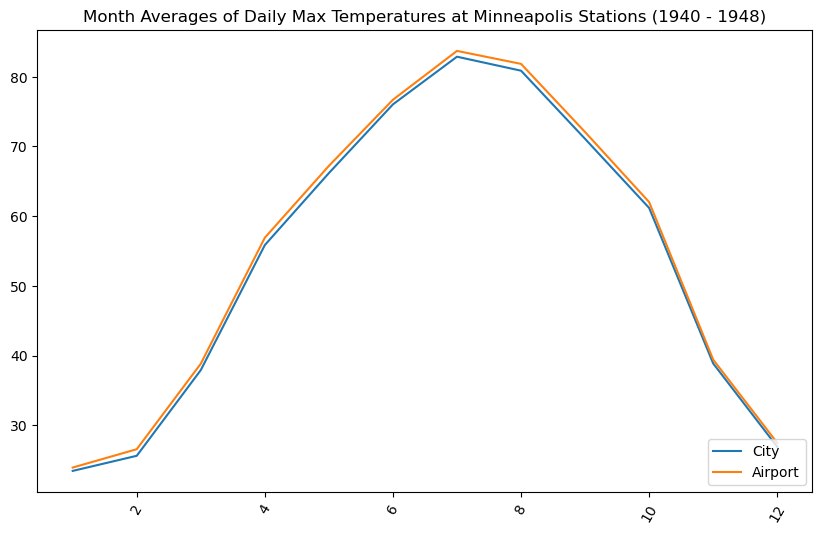

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize = (10,6))
plt.plot(mpls_city_40_48_monthly['month'], mpls_city_40_48_monthly['tmax'])
plt.plot(msp_air_40_48_monthly['month'], msp_air_40_48_monthly['tmax'])
plt.legend(["City", "Airport"], loc="lower right")
plt.title("Month Averages of Daily Max Temperatures at Minneapolis Stations (1940 - 1948)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

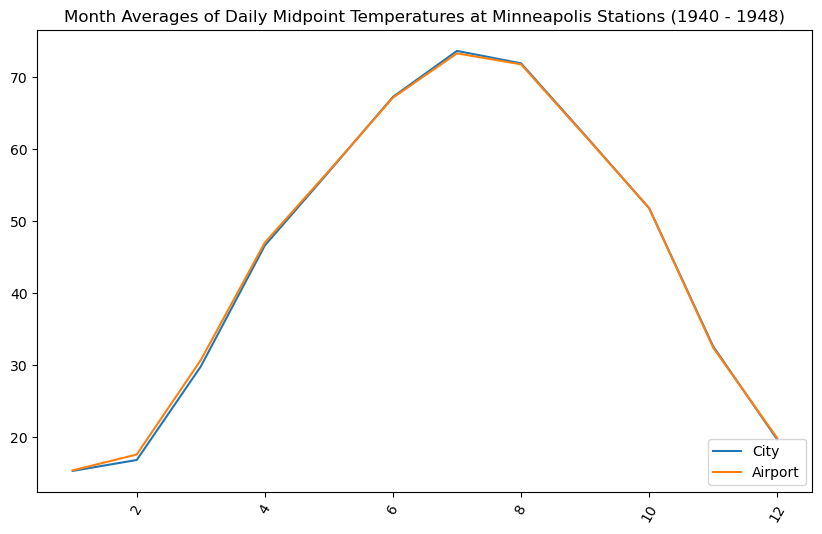

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize = (10,6))
plt.plot(mpls_city_40_48_monthly['month'], mpls_city_40_48_monthly['tmid'])
plt.plot(msp_air_40_48_monthly['month'], msp_air_40_48_monthly['tmid'])
plt.legend(["City", "Airport"], loc="lower right")
plt.title("Month Averages of Daily Midpoint Temperatures at Minneapolis Stations (1940 - 1948)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

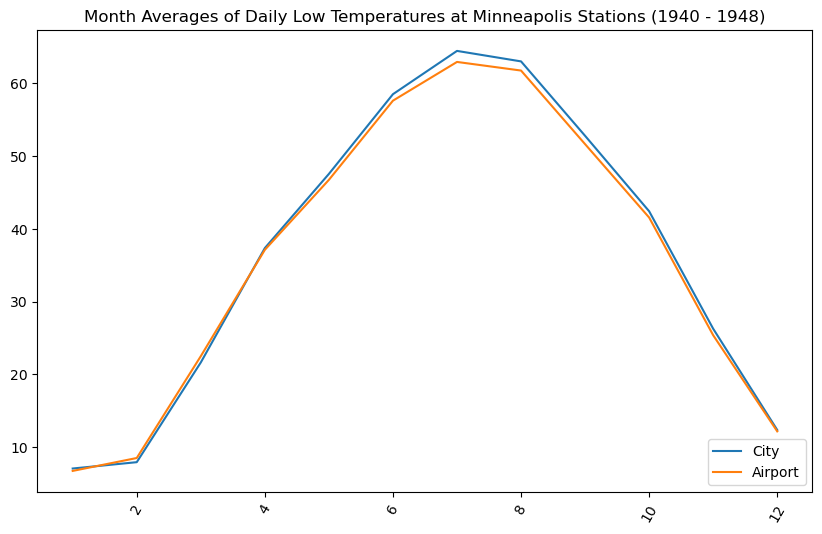

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize = (10,6))
plt.plot(mpls_city_40_48_monthly['month'], mpls_city_40_48_monthly['tmin'])
plt.plot(msp_air_40_48_monthly['month'], msp_air_40_48_monthly['tmin'])
plt.legend(["City", "Airport"], loc="lower right")
plt.title("Month Averages of Daily Low Temperatures at Minneapolis Stations (1940 - 1948)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [33]:
# Based on the above analysis, Tmid should be comparable between the two locations... will use City station for 1901 - 1937
# and Airport station for 1939 - 2023
# 1938 data is incomplete (only available for first 4 months) and is being omitted
# 1950 data is incomplete (only available for first 1 month) and is being omitted 

mpls_01_37 = mpls_01_48[mpls_01_48.year < 1938]
mpls_01_37.head()


,index,date,tmax,tmin,tmid,year,month,day
0,0,1901-01-01,10.04,-4.00,3.02,1901,1,1
1,1,1901-01-02,3.92,-13.00,-4.54,1901,1,2
2,2,1901-01-03,26.96,3.92,15.44,1901,1,3
3,3,1901-01-04,17.06,8.96,13.01,1901,1,4
4,4,1901-01-05,21.02,1.94,11.48,1901,1,5


In [34]:
msp_39_23.head()

,index,date,tmax,tmin,tmid,year,month,day
0,0,1939-01-01,33.98,6.98,20.48,1939,1,1
1,1,1939-01-02,24.98,15.98,20.48,1939,1,2
2,2,1939-01-03,28.94,21.02,24.98,1939,1,3
3,3,1939-01-04,33.98,26.96,30.47,1939,1,4
4,4,1939-01-05,33.98,21.92,27.95,1939,1,5


In [35]:
minny_alltime = pd.concat([mpls_01_37, msp_39_23], axis=0)
minny_alltime = minny_alltime[minny_alltime.year != 1950].reset_index()
minny_alltime.head()

,level_0,index,date,tmax,tmin,tmid,year,month,day
0,0,0,1901-01-01,10.04,-4.00,3.02,1901,1,1
1,1,1,1901-01-02,3.92,-13.00,-4.54,1901,1,2
2,2,2,1901-01-03,26.96,3.92,15.44,1901,1,3
3,3,3,1901-01-04,17.06,8.96,13.01,1901,1,4
4,4,4,1901-01-05,21.02,1.94,11.48,1901,1,5


In [36]:
minny_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44195 entries, 0 to 44194
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  44195 non-null  int64  
 1   index    44195 non-null  int64  
 2   date     44195 non-null  object 
 3   tmax     44195 non-null  float64
 4   tmin     44195 non-null  float64
 5   tmid     44195 non-null  float64
 6   year     44195 non-null  int32  
 7   month    44195 non-null  int32  
 8   day      44195 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(1)
memory usage: 2.5+ MB


In [37]:
minny_alltime.describe()

#print(minny_alltime(['tmax > 107']))

,level_0,index,tmax,tmin,tmid,year,month,day
count,44195.000000,44195.000000,44195.00000,44195.000000,44195.000000,44195.000000,44195.000000,44195.000000
mean,12734.029506,4374.872904,54.61648,36.578293,45.597386,1962.297319,6.522955,15.729562
std,8655.978429,2954.322785,24.26865,22.487437,23.117943,35.713331,3.448735,8.800160
min,0.000000,0.000000,-18.94000,-34.060000,-25.510000,1901.000000,1.000000,1.000000
25%,5539.500000,1841.000000,35.06000,21.020000,28.040000,1931.000000,4.000000,8.000000
50%,11064.000000,3908.000000,57.02000,37.940000,47.930000,1963.000000,7.000000,16.000000
75%,19662.500000,6642.000000,75.92000,55.940000,65.570000,1993.000000,10.000000,23.000000
max,30711.000000,10957.000000,107.96000,86.000000,95.540000,2023.000000,12.000000,31.000000


In [38]:
minny_alltime_yearly = minny_alltime.groupby(minny_alltime["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean'})

In [39]:
minny_01_60_yearly = minny_alltime_yearly[(minny_alltime_yearly.year < 1961)]

In [40]:
minny_1931 = minny_alltime[(minny_alltime.year ==1931)]
minny_1931.describe()
monthly_1931 = minny_1931.groupby('month').agg({'tmid':['mean', 'min', 'max']})

In [41]:
monthly_1931
print("1931 was the hottest September in Minnesota history up until September 2015, which surpassed it.")
print("The September heat wave was considered to be the beginning of the Dust Bowl era for Minnesota.")

1931 was the hottest September in Minnesota history up until September 2015, which surpassed it.
The September heat wave was considered to be the beginning of the Dust Bowl era for Minnesota.


In [42]:
tmid_01_60_base = minny_01_60_yearly.tmid.mean()
print("The Minneapolis midpoint temperature base for 1901-1960 is " + str(round(tmid_01_60_base, 1)) + " deg. F.")

The Minneapolis midpoint temperature base for 1901-1960 is 45.2 deg. F.


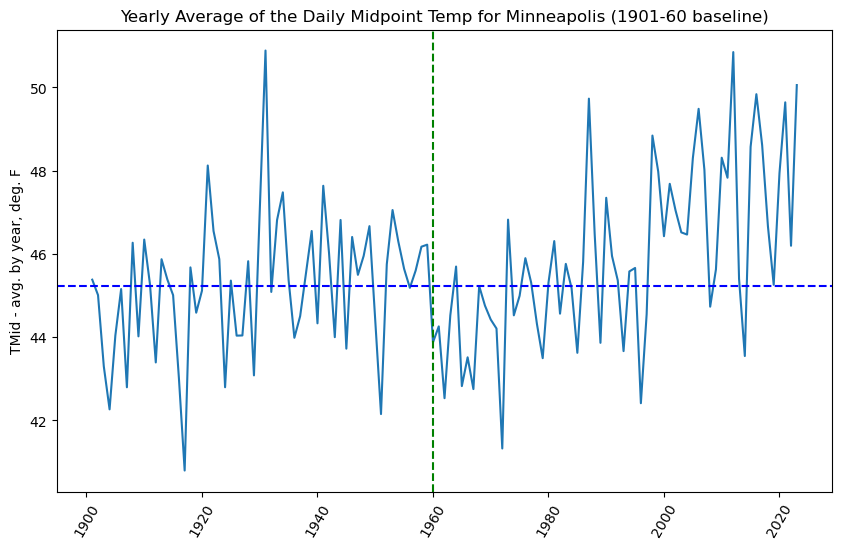

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize = (10,6))
plt.plot(minny_alltime_yearly['year'], minny_alltime_yearly['tmid'])
plt.axhline(tmid_01_60_base, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.ylabel("TMid - avg. by year, deg. F")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [44]:
minny_61_23_yearly = minny_alltime_yearly[(minny_alltime_yearly.year > 1960)]

In [45]:
minny_61_90_yearly = minny_61_23_yearly[(minny_61_23_yearly.year < 1991)]

In [46]:
tmax_61_90_base = minny_61_90_yearly.tmax.mean()
print("The Minneapolis daily high temperature average for 1961-1990 is " 
      + str(round(tmax_61_90_base, 1)) + " deg. F.")
tmid_61_90_base = minny_61_90_yearly.tmid.mean()
print("The Minneapolis daily midpoint temperature average for 1961-1990 is " 
      + str(round(tmid_61_90_base, 1)) + " deg. F.")
tmin_61_90_base = minny_61_90_yearly.tmin.mean()
print("The Minneapolis low temperature average for 1961-1990 is " 
      + str(round(tmin_61_90_base, 1)) + " deg. F.")

The Minneapolis daily high temperature average for 1961-1990 is 54.4 deg. F.
The Minneapolis daily midpoint temperature average for 1961-1990 is 44.8 deg. F.
The Minneapolis low temperature average for 1961-1990 is 35.3 deg. F.


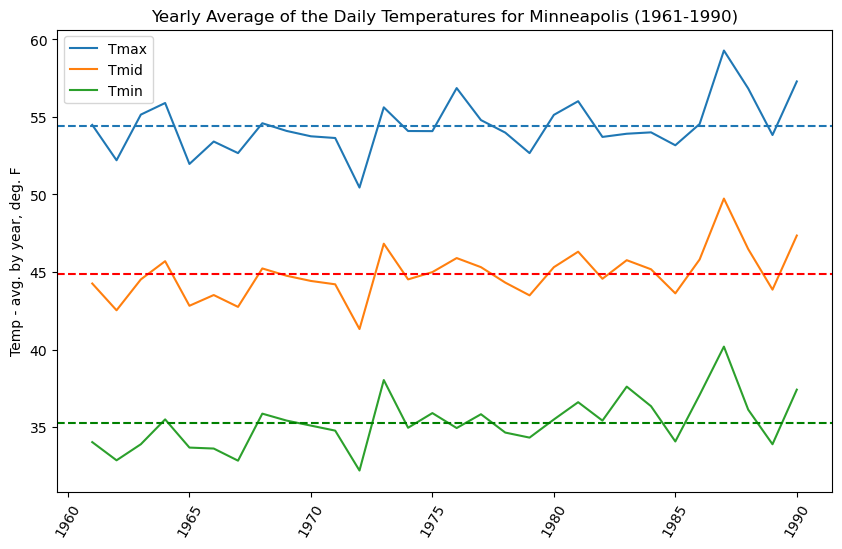

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize = (10,6))
plt.plot(minny_61_90_yearly['year'], minny_61_90_yearly['tmax'])
plt.plot(minny_61_90_yearly['year'], minny_61_90_yearly['tmid'])
plt.plot(minny_61_90_yearly['year'], minny_61_90_yearly['tmin'])
plt.legend(["Tmax", "Tmid", "Tmin"], loc="upper left")
plt.axhline(tmax_61_90_base, linestyle='dashed')
plt.axhline(tmid_61_90_base, color = 'r', linestyle='dashed')
plt.axhline(tmin_61_90_base, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the Daily Temperatures for Minneapolis (1961-1990)")
plt.ylabel("Temp - avg. by year, deg. F")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [48]:
minny_91_23_yearly = minny_61_23_yearly[(minny_61_23_yearly.year > 1990)]

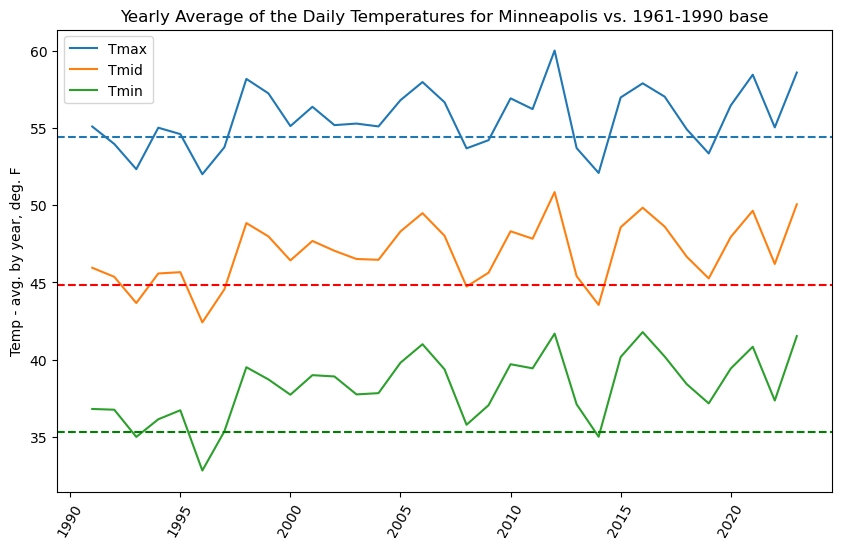

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(figsize = (10,6))
plt.plot(minny_91_23_yearly['year'], minny_91_23_yearly['tmax'])
plt.plot(minny_91_23_yearly['year'], minny_91_23_yearly['tmid'])
plt.plot(minny_91_23_yearly['year'], minny_91_23_yearly['tmin'])
plt.legend(["Tmax", "Tmid", "Tmin"], loc="upper left")
plt.axhline(tmax_61_90_base, linestyle='dashed')
plt.axhline(tmid_61_90_base, color = 'r', linestyle='dashed')
plt.axhline(tmin_61_90_base, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the Daily Temperatures for Minneapolis vs. 1961-1990 base")
plt.ylabel("Temp - avg. by year, deg. F")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [50]:
tmax_since_91 = round(minny_91_23_yearly.tmax.mean(), 2)
tmid_since_91 = round(minny_91_23_yearly.tmid.mean(), 2)
tmin_since_91 = round(minny_91_23_yearly.tmin.mean(), 2)

print("TMax mean since 1991 is " + str(round(tmax_since_91, 1)) + " deg. F, " + 
      str(round((tmax_since_91 - tmax_61_90_base), 1)) + " deg. F above 1961-1990 baseline of " + 
      str(round(tmax_61_90_base, 1)))
      
print("TMid mean since 1991 is " + str(round(tmid_since_91, 1)) + " deg. F, " + 
      str(round((tmid_since_91 - tmid_61_90_base), 1)) + " deg. F above 1961-1990 baseline of " + 
      str(round(tmid_61_90_base, 1)))
      
print("TMin mean since 1991 is " + str(round(tmin_since_91, 1)) + " deg. F, " + 
      str(round((tmin_since_91 - tmin_61_90_base), 1)) + " deg. F above 1961-1990 baseline of " + 
      str(round(tmin_61_90_base, 1)))

TMax mean since 1991 is 55.6 deg. F, 1.2 deg. F above 1961-1990 baseline of 54.4
TMid mean since 1991 is 46.9 deg. F, 2.1 deg. F above 1961-1990 baseline of 44.8
TMin mean since 1991 is 38.2 deg. F, 2.9 deg. F above 1961-1990 baseline of 35.3


In [51]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm 

In [52]:
x = minny_91_23_yearly.year - 1991
y = minny_91_23_yearly.tmax
n = len(minny_91_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Max is increasing by " + str(round(b1, 4)) + " deg. F per year since 1991.")
print('')
year_predict = 2024
T_predict = b0 + (year_predict - 1991) * b1
print("Predicted T-Max for " + str(year_predict)  + " is " + str(round(T_predict, 1)) + " deg. F, "
      + str(round(T_predict - tmax_61_90_base, 1)) + " deg. F above 1961-1990 baseline of " 
      + str(round(tmax_61_90_base, 1)))

slope b1 is 0.0696
intercept b0 is 54.531

T-Max is increasing by 0.0696 deg. F per year since 1991.

Predicted T-Max for 2024 is 56.8 deg. F, 2.4 deg. F above 1961-1990 baseline of 54.4


Correlation coefficient = 0.3387
p-value = 0.0538


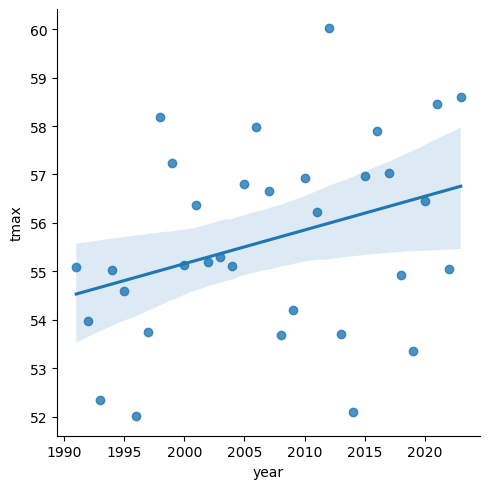

In [53]:
import warnings
warnings.filterwarnings('ignore')

sns.lmplot(x="year", y="tmax", data=minny_91_23_yearly)
from scipy.stats import pearsonr

corr_tmax_year, p = pearsonr(minny_91_23_yearly.tmax, minny_91_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmax_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [54]:
x = minny_91_23_yearly.year - 1991
y = minny_91_23_yearly.tmid
n = len(minny_91_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid is increasing by " + str(round(b1, 4)) + " deg. F per year since 1991.")
print('')
year_predict = 2024
T_predict = b0 + (year_predict - 1991) * b1
print("Predicted T-Mid for " + str(year_predict)  + " is " + str(round(T_predict, 1)) + " deg. F, "
      + str(round(T_predict - tmid_61_90_base, 1)) + " deg. F above 1961-1990 baseline of " 
      + str(round(tmid_61_90_base, 1)))

slope b1 is 0.0918
intercept b0 is 45.47

T-Mid is increasing by 0.0918 deg. F per year since 1991.

Predicted T-Mid for 2024 is 48.5 deg. F, 3.7 deg. F above 1961-1990 baseline of 44.8


Correlation coefficient = 0.4353
p-value = 0.0113


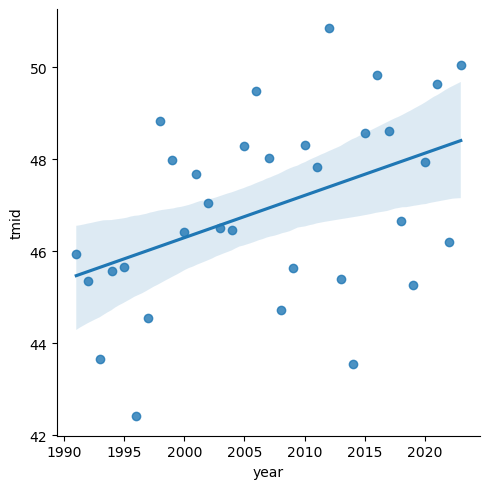

In [55]:
sns.lmplot(x="year", y="tmid", data=minny_91_23_yearly)

corr_tmid_year, p = pearsonr(minny_91_23_yearly.tmid, minny_91_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [56]:
x = minny_91_23_yearly.year - 1991
y = minny_91_23_yearly.tmin
n = len(minny_91_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Min is increasing by " + str(round(b1, 4)) + " deg. F per year since 1991.")
print('')
year_predict = 2024
T_predict = b0 + (year_predict - 1991) * b1
print("Predicted T-Min for " + str(year_predict)  + " is " + str(round(T_predict, 1)) + " deg. F, "
      + str(round(T_predict - tmin_61_90_base, 1)) + " deg. F above 1961-1990 baseline of " 
      + str(round(tmin_61_90_base, 1)))

slope b1 is 0.1141
intercept b0 is 36.408

T-Min is increasing by 0.1141 deg. F per year since 1991.

Predicted T-Min for 2024 is 40.2 deg. F, 4.9 deg. F above 1961-1990 baseline of 35.3


Correlation coefficient = 0.51
p-value = 0.0024


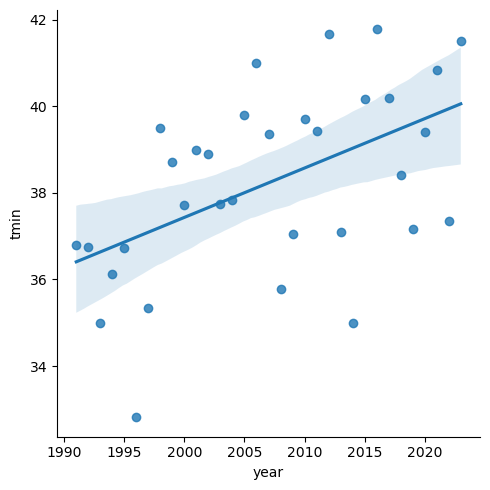

In [57]:
sns.lmplot(x="year", y="tmin", data=minny_91_23_yearly)

corr_tmin_year, p = pearsonr(minny_91_23_yearly.tmin, minny_91_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmin_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [58]:
x = minny_61_23_yearly.year - 1961
y = minny_61_23_yearly.tmid
n = len(minny_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid is increasing by " + str(round(b1, 4)) + " deg. F per year since 1961.")
print('')
year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1
print("Predicted T-Mid for " + str(year_predict)  + " is " + str(round(T_predict, 1)) + " deg. F, "
      + str(round(T_predict - tmid_01_60_base, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(tmid_01_60_base, 1)))

slope b1 is 0.0729
intercept b0 is 43.68

T-Mid is increasing by 0.0729 deg. F per year since 1961.

Predicted T-Mid for 2024 is 48.3 deg. F, 3.1 deg. F above 1901-1960 baseline of 45.2


Correlation coefficient = 0.6302
p-value = 3.12e-08


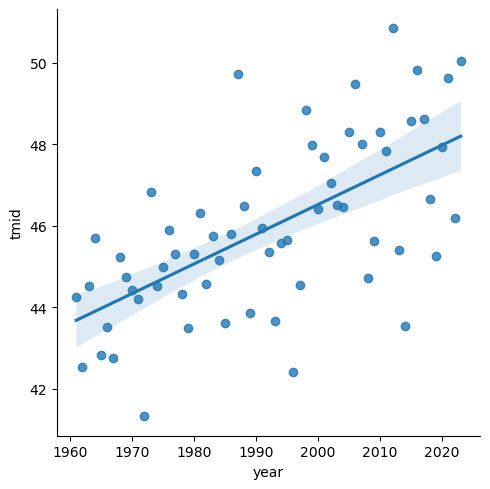

In [59]:
sns.lmplot(x="year", y="tmid", data=minny_61_23_yearly)

corr_tmid_year, p = pearsonr(minny_61_23_yearly.tmid, minny_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 10)))

In [60]:
jan = minny_alltime[minny_alltime['month']==1]
feb = minny_alltime[minny_alltime['month']==2]
mar = minny_alltime[minny_alltime['month']==3]
apr = minny_alltime[minny_alltime['month']==4]
may = minny_alltime[minny_alltime['month']==5]
jun = minny_alltime[minny_alltime['month']==6]
jul = minny_alltime[minny_alltime['month']==7]
aug = minny_alltime[minny_alltime['month']==8]
sep = minny_alltime[minny_alltime['month']==9]
oct = minny_alltime[minny_alltime['month']==10]
nov = minny_alltime[minny_alltime['month']==11]
dec = minny_alltime[minny_alltime['month']==12]
jan.head()

,level_0,index,date,tmax,tmin,tmid,year,month,day
0,0,0,1901-01-01,10.04,-4.00,3.02,1901,1,1
1,1,1,1901-01-02,3.92,-13.00,-4.54,1901,1,2
2,2,2,1901-01-03,26.96,3.92,15.44,1901,1,3
3,3,3,1901-01-04,17.06,8.96,13.01,1901,1,4
4,4,4,1901-01-05,21.02,1.94,11.48,1901,1,5


In [61]:
jan_01_60 = jan[jan.year < 1961]
jan_baseline_tmid = jan_01_60.tmid.mean()

feb_01_60 = feb[feb.year < 1961]
feb_baseline_tmid = feb_01_60.tmid.mean()

mar_01_60 = mar[mar.year < 1961]
mar_baseline_tmid = mar_01_60.tmid.mean()

apr_01_60 = apr[apr.year < 1961]
apr_baseline_tmid = apr_01_60.tmid.mean()

may_01_60 = may[may.year < 1961]
may_baseline_tmid = may_01_60.tmid.mean()

jun_01_60 = jun[jun.year < 1961]
jun_baseline_tmid = jun_01_60.tmid.mean()

jul_01_60 = jul[jul.year < 1961]
jul_baseline_tmid = jul_01_60.tmid.mean()

aug_01_60 = aug[aug.year < 1961]
aug_baseline_tmid = aug_01_60.tmid.mean()

sep_01_60 = sep[sep.year < 1961]
sep_baseline_tmid = sep_01_60.tmid.mean() 

oct_01_60 = oct[oct.year < 1961]
oct_baseline_tmid = oct_01_60.tmid.mean()

nov_01_60 = nov[nov.year < 1961]
nov_baseline_tmid = nov_01_60.tmid.mean()

dec_01_60 = dec[dec.year < 1961]
dec_baseline_tmid = dec_01_60.tmid.mean()

In [62]:
jan_yearly = jan.groupby(jan["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
feb_yearly = feb.groupby(feb["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
mar_yearly = mar.groupby(mar["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
apr_yearly = apr.groupby(apr["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
may_yearly = may.groupby(may["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
jun_yearly = jun.groupby(jun["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
jul_yearly = jul.groupby(jul["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
aug_yearly = aug.groupby(aug["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
sep_yearly = sep.groupby(sep["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
oct_yearly = oct.groupby(oct["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
nov_yearly = nov.groupby(nov["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
dec_yearly = dec.groupby(dec["year"]).agg({'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})

In [63]:
jan_61_23 = jan[jan.year > 1960]
feb_61_23 = feb[feb.year > 1960]
mar_61_23 = mar[mar.year > 1960]
apr_61_23 = apr[apr.year > 1960]
may_61_23 = may[may.year > 1960]
jun_61_23 = jun[jun.year > 1960]
jul_61_23 = jul[jul.year > 1960]
aug_61_23 = aug[aug.year > 1960]
sep_61_23 = sep[sep.year > 1960]
oct_61_23 = oct[oct.year > 1960]
nov_61_23 = nov[nov.year > 1960]
dec_61_23 = dec[dec.year > 1960]

In [66]:
jan_61_23.to_csv('jan_61_23.csv')
feb_61_23.to_csv('feb_61_23.csv')
mar_61_23.to_csv('mar_61_23.csv')
apr_61_23.to_csv('apr_61_23.csv')
may_61_23.to_csv('may_61_23.csv')
jun_61_23.to_csv('jun_61_23.csv')
jul_61_23.to_csv('jul_61_23.csv')
aug_61_23.to_csv('aug_61_23.csv')
sep_61_23.to_csv('sep_61_23.csv')
oct_61_23.to_csv('oct_61_23.csv')
nov_61_23.to_csv('nov_61_23.csv')
dec_61_23.to_csv('dec_61_23.csv')

In [67]:
jan_61_23_yearly = jan_61_23.groupby(jan_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
feb_61_23_yearly = feb_61_23.groupby(feb_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
mar_61_23_yearly = mar_61_23.groupby(mar_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
apr_61_23_yearly = apr_61_23.groupby(apr_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
may_61_23_yearly = may_61_23.groupby(may_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
jun_61_23_yearly = jun_61_23.groupby(jun_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
jul_61_23_yearly = jul_61_23.groupby(jul_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
aug_61_23_yearly = aug_61_23.groupby(aug_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
sep_61_23_yearly = sep_61_23.groupby(sep_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
oct_61_23_yearly = oct_61_23.groupby(oct_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
nov_61_23_yearly = nov_61_23.groupby(nov_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})
dec_61_23_yearly = dec_61_23.groupby(dec_61_23["year"]).agg(
    {'year':'mean', 'tmax':'mean', 'tmin':'mean', 'tmid':'mean', 'month':'mean'})

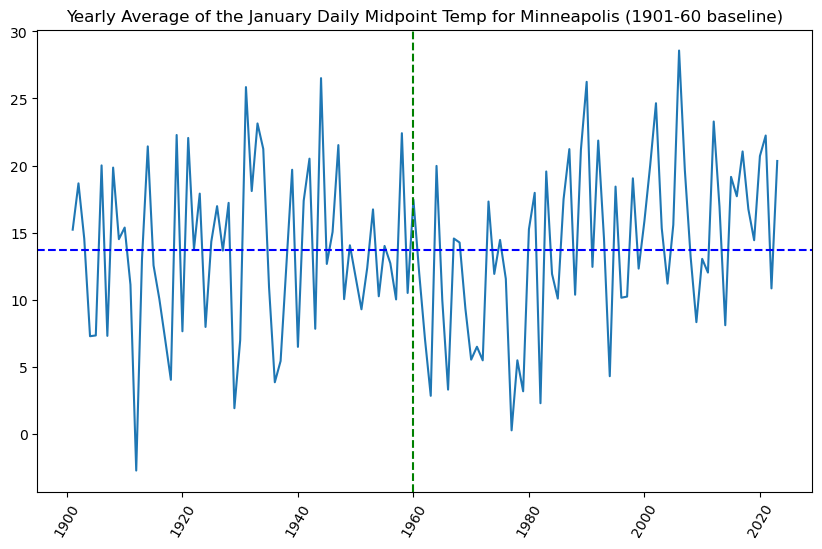

<Figure size 640x480 with 0 Axes>

In [68]:
plt.figure(figsize = (10,6))
plt.plot(jan_yearly['year'], jan_yearly['tmid'])
plt.axhline(jan_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the January Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [69]:
x = jan_yearly.year - 1901
y = jan_yearly.tmid
n = len(jan_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for January has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0279
intercept b0 is 12.145

T-Mid for January has been increasing by 0.0279 deg. F per year since 1901


Correlation coefficient = 0.1592
p-value = 0.0811


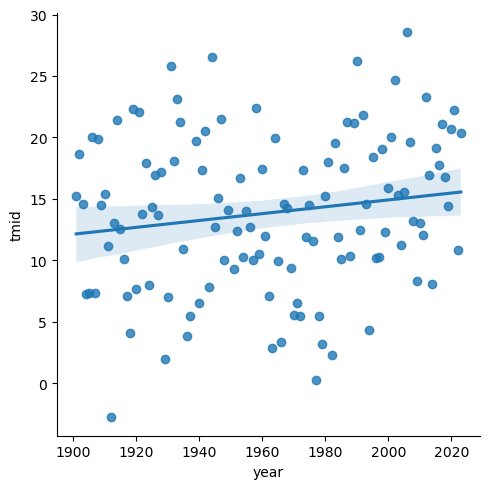

In [70]:
sns.lmplot(x="year", y="tmid", data=jan_yearly)

corr_tmid_year, p = pearsonr(jan_yearly.tmid, jan_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [71]:
x = jan_61_23_yearly.year - 1961
y = jan_61_23_yearly.tmid
n = len(jan_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for January has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')
year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1
print("Predicted T-Mid for January " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - jan_baseline_tmid, 1)) + " deg. F above the 1901-1960 baseline of " 
      + str(round(jan_baseline_tmid, 1)))

slope b1 is 0.1557
intercept b0 is 9.157

T-Mid for January has been increasing by 0.1557 deg. F per year since 1961

Predicted T-Mid for January 2024 is 19.0 deg. F, which is 5.3 deg. F above the 1901-1960 baseline of 13.7


Correlation coefficient = 0.4478
p-value = 0.0002


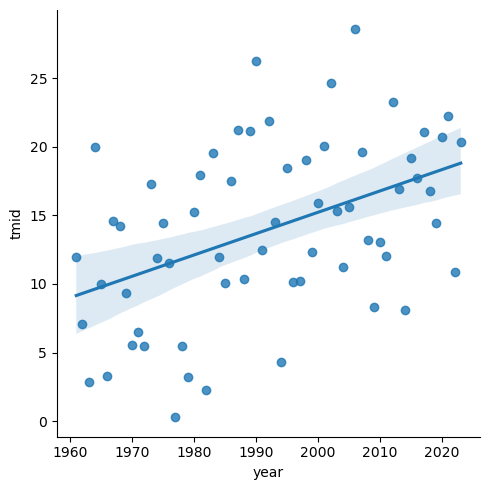

In [72]:
sns.lmplot(x="year", y="tmid", data=jan_61_23_yearly)

corr_tmid_year, p = pearsonr(jan_61_23_yearly.tmid, jan_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

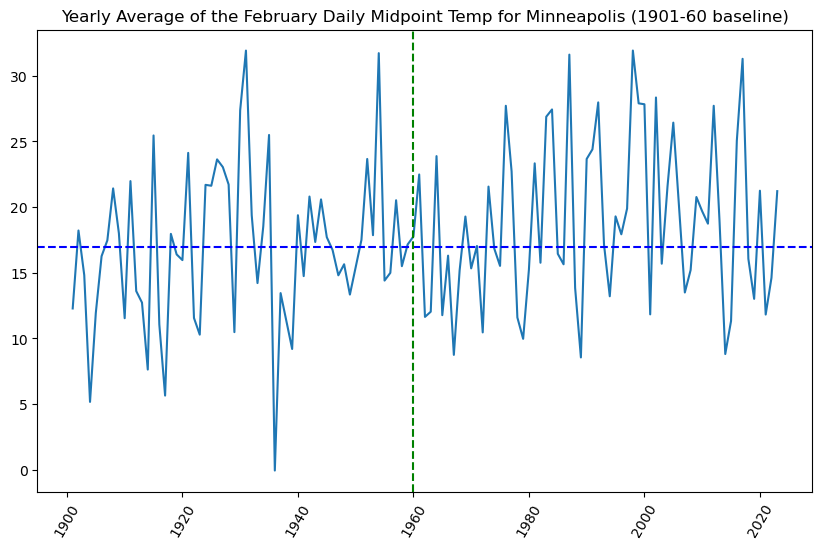

<Figure size 640x480 with 0 Axes>

In [73]:
plt.figure(figsize = (10,6))
plt.plot(feb_yearly['year'], feb_yearly['tmid'])
plt.axhline(feb_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the February Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [74]:
x = feb_yearly.year - 1901
y = feb_yearly.tmid
n = len(feb_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for February has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0372
intercept b0 is 15.689

T-Mid for February has been increasing by 0.0372 deg. F per year since 1901


Correlation coefficient = 0.2146
p-value = 0.0181


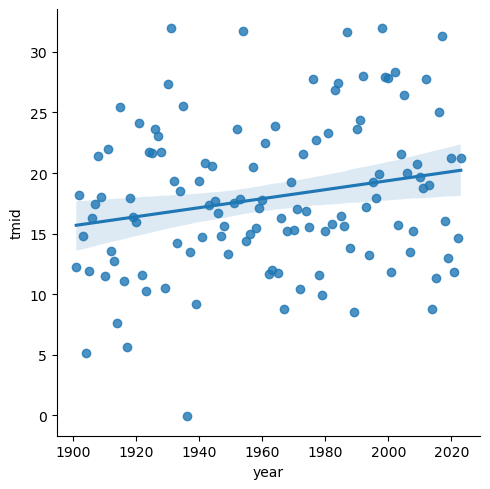

In [75]:
sns.lmplot(x="year", y="tmid", data=feb_yearly)

corr_tmid_year, p = pearsonr(feb_yearly.tmid, feb_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [76]:
x = feb_61_23_yearly.year - 1961
y = feb_61_23_yearly.tmid
n = len(feb_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for February has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for February " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - feb_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(feb_baseline_tmid, 1)))

slope b1 is 0.051
intercept b0 is 17.29

T-Mid for February has been increasing by 0.051 deg. F per year since 1961

Predicted T-Mid for February 2024 is 20.5 deg. F, which is 3.5 deg. F above 1901-1960 baseline of 17.0


Correlation coefficient = 0.1486
p-value = 0.245


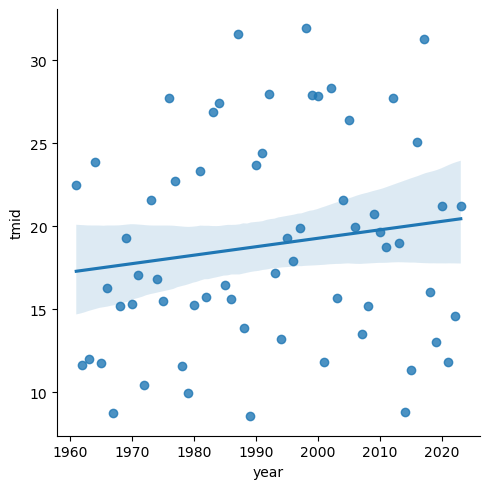

In [77]:
sns.lmplot(x="year", y="tmid", data=feb_61_23_yearly)

corr_tmid_year, p = pearsonr(feb_61_23_yearly.tmid, feb_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

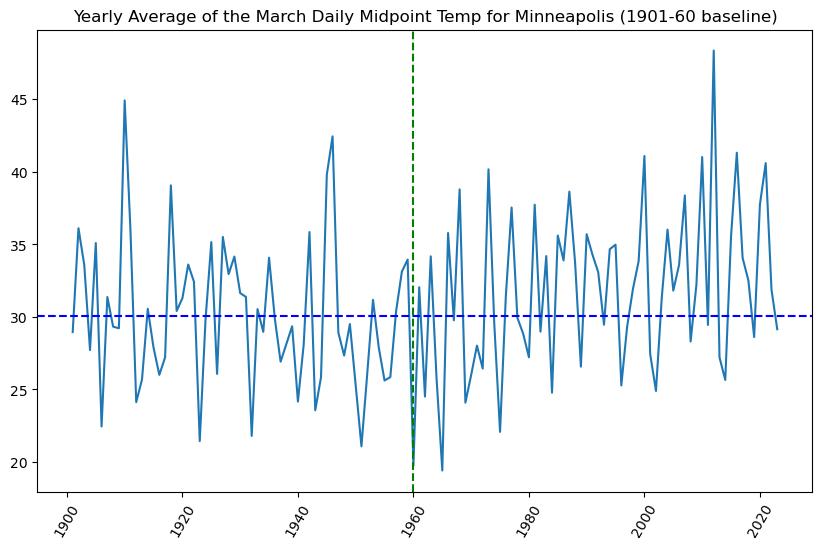

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize = (10,6))
plt.plot(mar_yearly['year'], mar_yearly['tmid'])
plt.axhline(mar_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the March Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [79]:
x = mar_yearly.year - 1901
y = mar_yearly.tmid
n = len(mar_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for March has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0298
intercept b0 is 29.239

T-Mid for March has been increasing by 0.0298 deg. F per year since 1901


Correlation coefficient = 0.1981
p-value = 0.0294


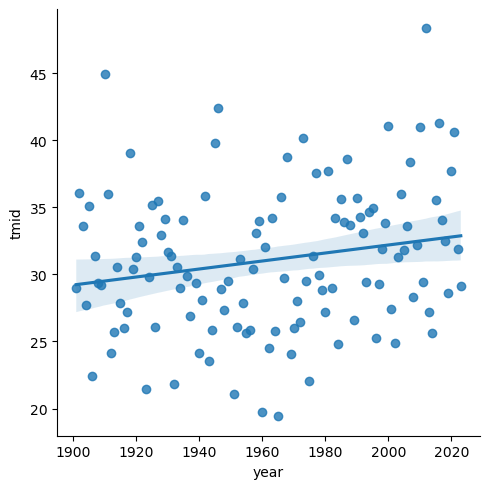

In [80]:
sns.lmplot(x="year", y="tmid", data=mar_yearly)

corr_tmid_year, p = pearsonr(mar_yearly.tmid, mar_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [81]:
x = mar_61_23_yearly.year - 1961
y = mar_61_23_yearly.tmid
n = len(mar_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for March has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for March " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - mar_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(mar_baseline_tmid, 1)))

slope b1 is 0.0895
intercept b0 is 29.226

T-Mid for March has been increasing by 0.0895 deg. F per year since 1961

Predicted T-Mid for March 2024 is 34.9 deg. F, which is 4.8 deg. F above 1901-1960 baseline of 30.1


Correlation coefficient = 0.2987
p-value = 0.0174


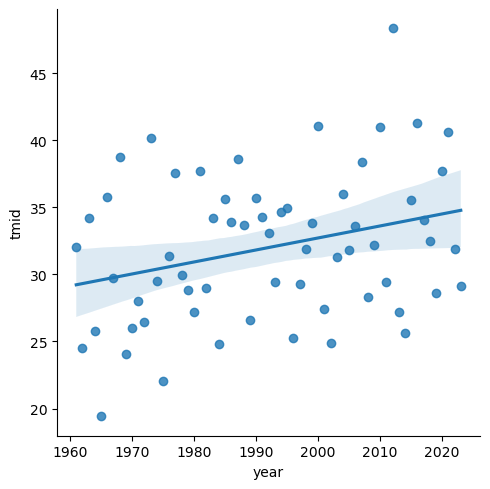

In [82]:
sns.lmplot(x="year", y="tmid", data=mar_61_23_yearly)

corr_tmid_year, p = pearsonr(mar_61_23_yearly.tmid, mar_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

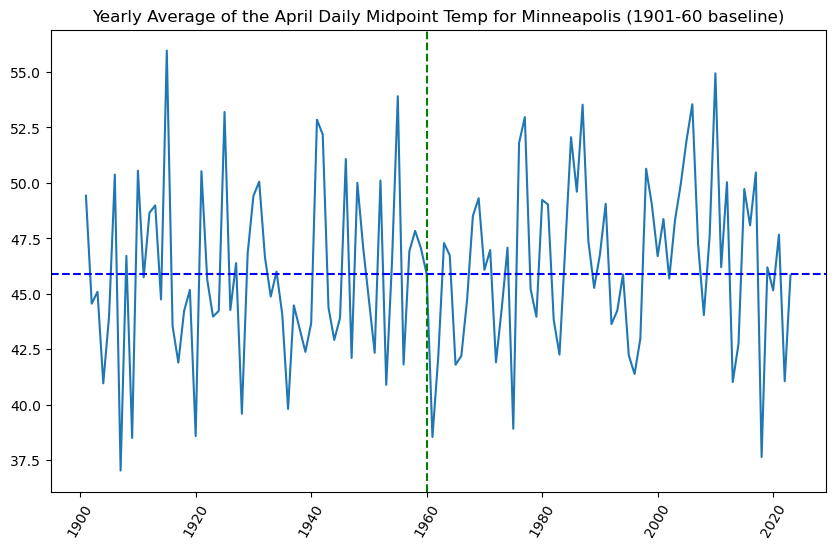

<Figure size 640x480 with 0 Axes>

In [83]:
plt.figure(figsize = (10,6))
plt.plot(apr_yearly['year'], apr_yearly['tmid'])
plt.axhline(apr_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the April Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [84]:
x = apr_yearly.year - 1901
y = apr_yearly.tmid
n = len(apr_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for April has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0131
intercept b0 is 45.361

T-Mid for April has been increasing by 0.0131 deg. F per year since 1901


Correlation coefficient = 0.1194
p-value = 0.1922


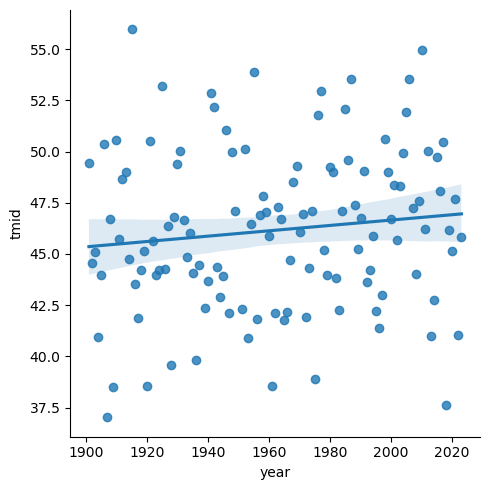

In [85]:
sns.lmplot(x="year", y="tmid", data=apr_yearly)

corr_tmid_year, p = pearsonr(apr_yearly.tmid, apr_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [86]:
x = apr_61_23_yearly.year - 1961
y = apr_61_23_yearly.tmid
n = len(apr_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for April has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for April " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - apr_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(apr_baseline_tmid, 1)))

slope b1 is 0.0272
intercept b0 is 45.595

T-Mid for April has been increasing by 0.0272 deg. F per year since 1961

Predicted T-Mid for April 2024 is 47.3 deg. F, which is 1.4 deg. F above 1901-1960 baseline of 45.9


Correlation coefficient = 0.1301
p-value = 0.3095


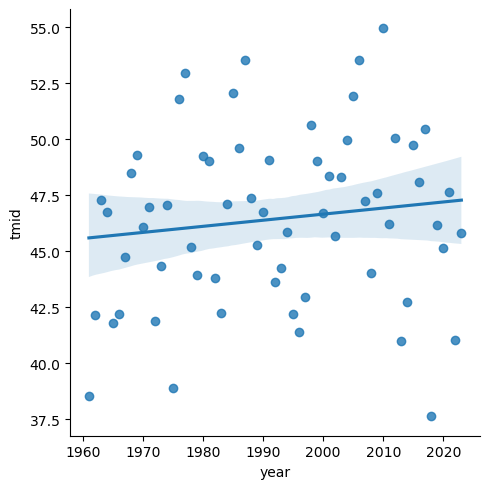

In [87]:
sns.lmplot(x="year", y="tmid", data=apr_61_23_yearly)

corr_tmid_year, p = pearsonr(apr_61_23_yearly.tmid, apr_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

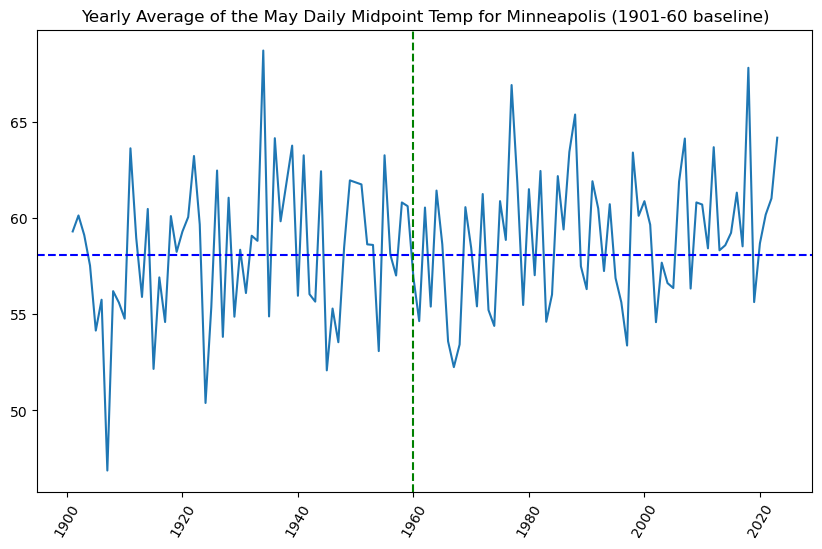

<Figure size 640x480 with 0 Axes>

In [88]:
plt.figure(figsize = (10,6))
plt.plot(may_yearly['year'], may_yearly['tmid'])
plt.axhline(may_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the May Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [89]:
x = may_yearly.year - 1901
y = may_yearly.tmid
n = len(may_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for May has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0232
intercept b0 is 57.15

T-Mid for May has been increasing by 0.0232 deg. F per year since 1901


Correlation coefficient = 0.2265
p-value = 0.0125


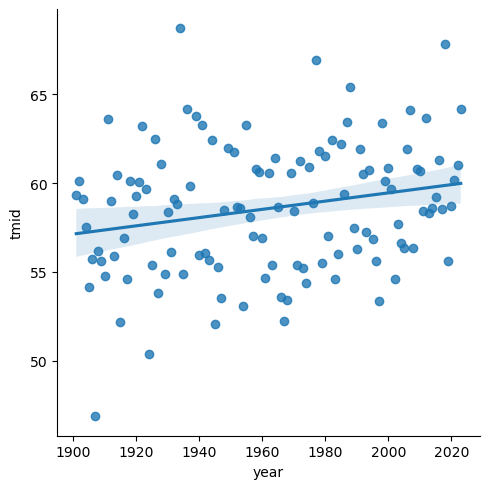

In [90]:
sns.lmplot(x="year", y="tmid", data=may_yearly)

corr_tmid_year, p = pearsonr(may_yearly.tmid, may_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [91]:
x = may_61_23_yearly.year - 1961
y = may_61_23_yearly.tmid
n = len(may_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for May has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for May " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - may_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(may_baseline_tmid, 1)))

slope b1 is 0.0514
intercept b0 is 57.451

T-Mid for May has been increasing by 0.0514 deg. F per year since 1961

Predicted T-Mid for May 2024 is 60.7 deg. F, which is 2.6 deg. F above 1901-1960 baseline of 58.1


Correlation coefficient = 0.2724
p-value = 0.0308


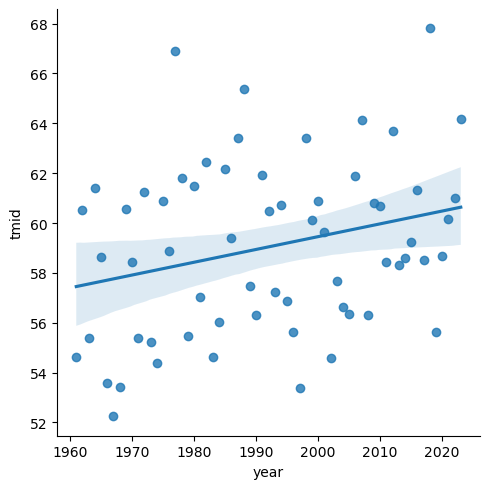

In [92]:
sns.lmplot(x="year", y="tmid", data=may_61_23_yearly)

corr_tmid_year, p = pearsonr(may_61_23_yearly.tmid, may_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

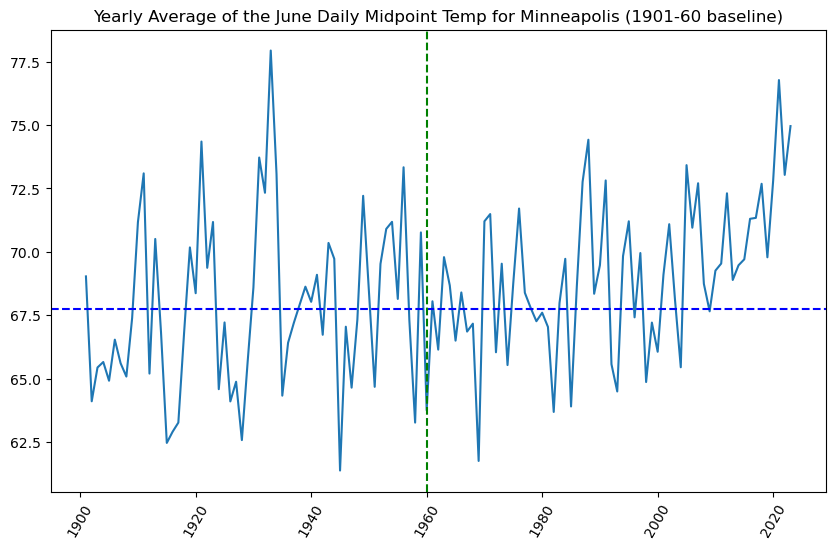

<Figure size 640x480 with 0 Axes>

In [93]:
plt.figure(figsize = (10,6))
plt.plot(jun_yearly['year'], jun_yearly['tmid'])
plt.axhline(jun_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the June Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [94]:
x = jun_yearly.year - 1901
y = jun_yearly.tmid
n = len(jun_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for June has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0297
intercept b0 is 66.633

T-Mid for June has been increasing by 0.0297 deg. F per year since 1901


Correlation coefficient = 0.3257
p-value = 0.0003


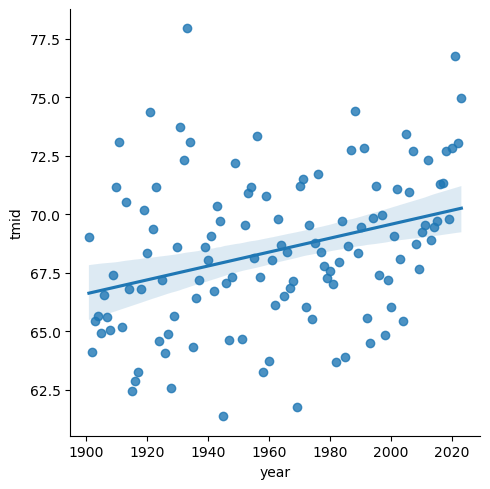

In [95]:
sns.lmplot(x="year", y="tmid", data=jun_yearly)

corr_tmid_year, p = pearsonr(jun_yearly.tmid, jun_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [96]:
x = jun_61_23_yearly.year - 1961
y = jun_61_23_yearly.tmid
n = len(jun_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for June has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for June " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - jun_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(jun_baseline_tmid, 1)))

slope b1 is 0.0747
intercept b0 is 66.78

T-Mid for June has been increasing by 0.0747 deg. F per year since 1961

Predicted T-Mid for June 2024 is 71.5 deg. F, which is 3.7 deg. F above 1901-1960 baseline of 67.8


Correlation coefficient = 0.4676
p-value = 0.0001


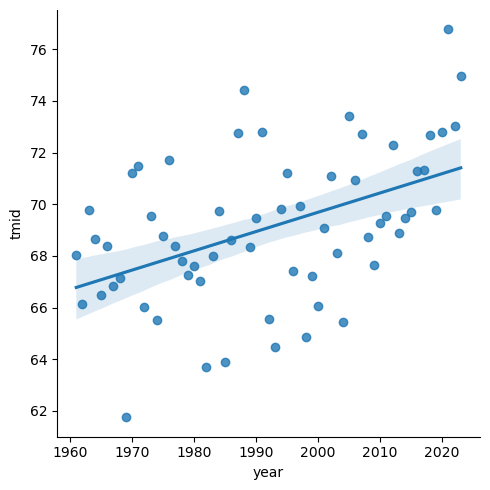

In [97]:
sns.lmplot(x="year", y="tmid", data=jun_61_23_yearly)

corr_tmid_year, p = pearsonr(jun_61_23_yearly.tmid, jun_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

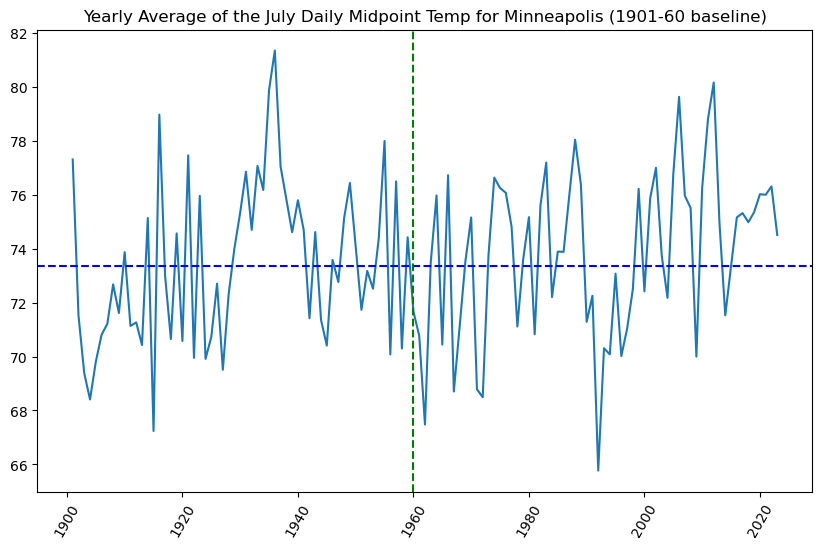

<Figure size 640x480 with 0 Axes>

In [98]:
plt.figure(figsize = (10,6))
plt.plot(jul_yearly['year'], jul_yearly['tmid'])
plt.axhline(jul_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the July Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [99]:
x = jul_yearly.year - 1901
y = jul_yearly.tmid
n = len(jul_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for July has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0186
intercept b0 is 72.465

T-Mid for July has been increasing by 0.0186 deg. F per year since 1901


Correlation coefficient = 0.2213
p-value = 0.0147


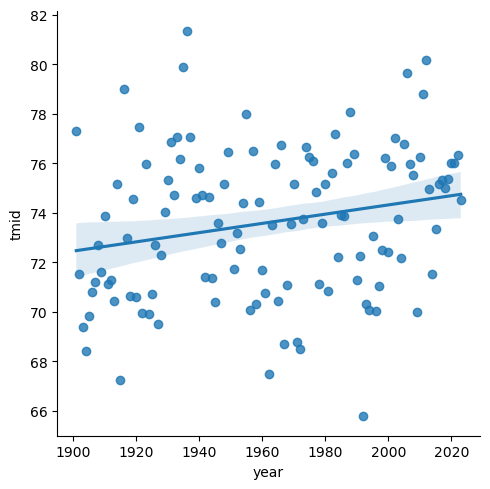

In [100]:
sns.lmplot(x="year", y="tmid", data=jul_yearly)

corr_tmid_year, p = pearsonr(jul_yearly.tmid, jul_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [101]:
x = jul_61_23_yearly.year - 1961
y = jul_61_23_yearly.tmid
n = len(jul_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for July has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for July " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - jul_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(jul_baseline_tmid, 1)))

slope b1 is 0.0563
intercept b0 is 72.104

T-Mid for July has been increasing by 0.0563 deg. F per year since 1961

Predicted T-Mid for July 2024 is 75.6 deg. F, which is 2.3 deg. F above 1901-1960 baseline of 73.3


Correlation coefficient = 0.3421
p-value = 0.0061


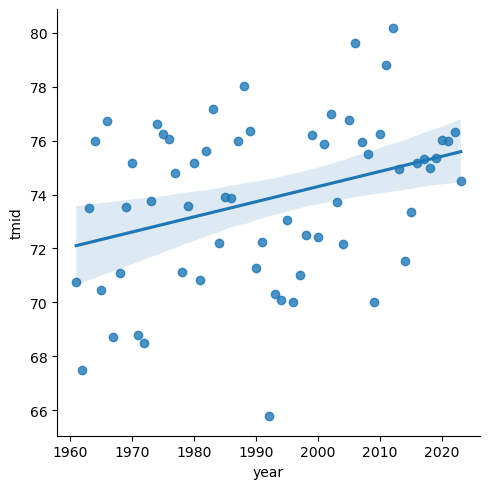

In [102]:
sns.lmplot(x="year", y="tmid", data=jul_61_23_yearly)

corr_tmid_year, p = pearsonr(jul_61_23_yearly.tmid, jul_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

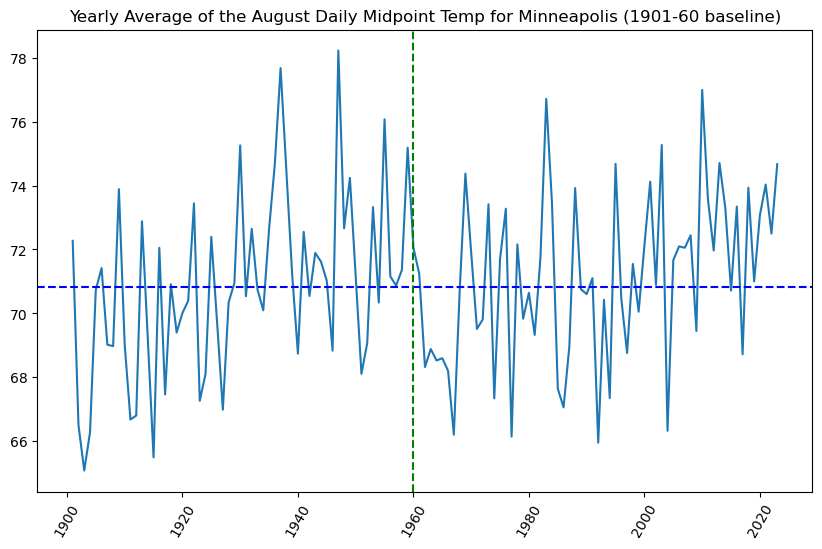

<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure(figsize = (10,6))
plt.plot(aug_yearly['year'], aug_yearly['tmid'])
plt.axhline(aug_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the August Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [104]:
x = aug_yearly.year - 1901
y = aug_yearly.tmid
n = len(aug_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for August has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0196
intercept b0 is 69.763

T-Mid for August has been increasing by 0.0196 deg. F per year since 1901


Correlation coefficient = 0.2572
p-value = 0.0044


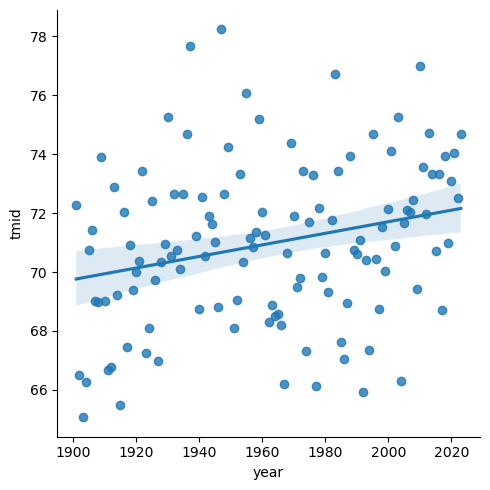

In [105]:
sns.lmplot(x="year", y="tmid", data=aug_yearly)

corr_tmid_year, p = pearsonr(aug_yearly.tmid, aug_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [106]:
x = aug_61_23_yearly.year - 1961
y = aug_61_23_yearly.tmid
n = len(aug_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for August has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for August " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - aug_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(aug_baseline_tmid, 1)))

slope b1 is 0.0573
intercept b0 is 69.337

T-Mid for August has been increasing by 0.0573 deg. F per year since 1961

Predicted T-Mid for August 2024 is 72.9 deg. F, which is 2.1 deg. F above 1901-1960 baseline of 70.8


Correlation coefficient = 0.397
p-value = 0.0013


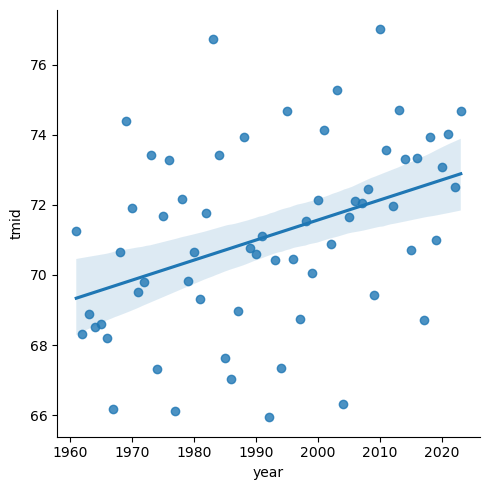

In [107]:
sns.lmplot(x="year", y="tmid", data=aug_61_23_yearly)

corr_tmid_year, p = pearsonr(aug_61_23_yearly.tmid, aug_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

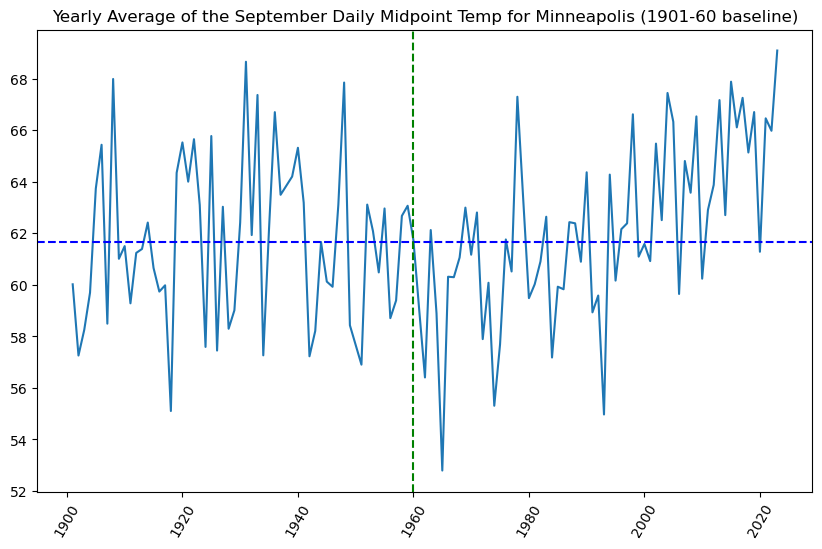

<Figure size 640x480 with 0 Axes>

In [108]:
plt.figure(figsize = (10,6))
plt.plot(sep_yearly['year'], sep_yearly['tmid'])
plt.axhline(sep_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the September Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [109]:
x = sep_yearly.year - 1901
y = sep_yearly.tmid
n = len(sep_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for September has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0224
intercept b0 is 60.528

T-Mid for September has been increasing by 0.0224 deg. F per year since 1901


Correlation coefficient = 0.2436
p-value = 0.0071


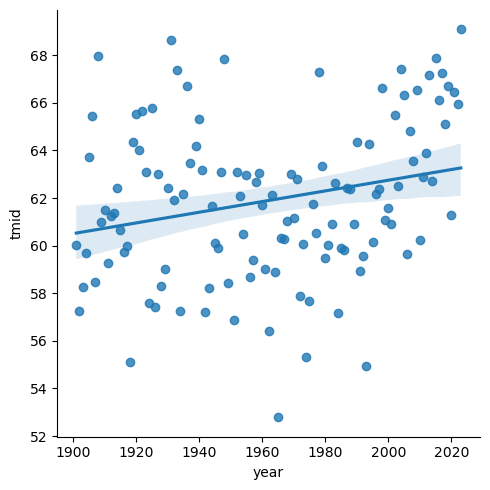

In [110]:
sns.lmplot(x="year", y="tmid", data=sep_yearly)

corr_tmid_year, p = pearsonr(sep_yearly.tmid, sep_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [111]:
x = sep_61_23_yearly.year - 1961
y = sep_61_23_yearly.tmid
n = len(sep_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for September has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for September " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - sep_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(sep_baseline_tmid, 1)))

slope b1 is 0.1197
intercept b0 is 58.406

T-Mid for September has been increasing by 0.1197 deg. F per year since 1961

Predicted T-Mid for September 2024 is 65.9 deg. F, which is 4.3 deg. F above 1901-1960 baseline of 61.7


Correlation coefficient = 0.6364
p-value = 2.07e-08


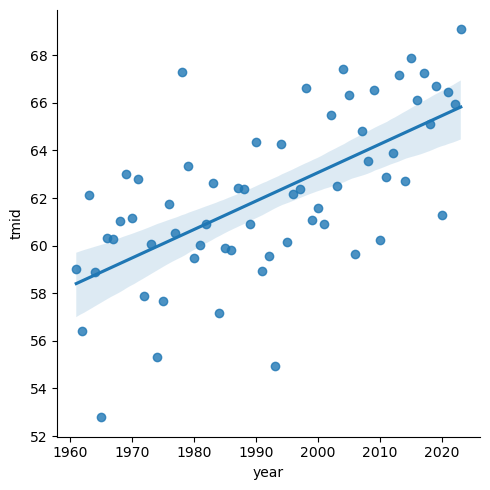

In [112]:
sns.lmplot(x="year", y="tmid", data=sep_61_23_yearly)

corr_tmid_year, p = pearsonr(sep_61_23_yearly.tmid, sep_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 10)))

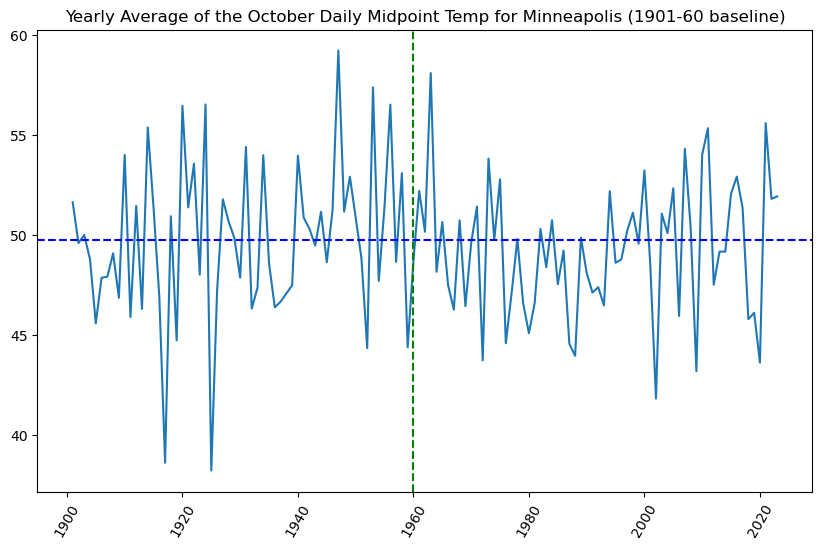

<Figure size 640x480 with 0 Axes>

In [113]:
plt.figure(figsize = (10,6))
plt.plot(oct_yearly['year'], oct_yearly['tmid'])
plt.axhline(oct_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the October Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [114]:
x = oct_yearly.year - 1901
y = oct_yearly.tmid
n = len(oct_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for October has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is -0.0001
intercept b0 is 49.49

T-Mid for October has been increasing by -0.0001 deg. F per year since 1901


Correlation coefficient = -0.0012
p-value = 0.9897


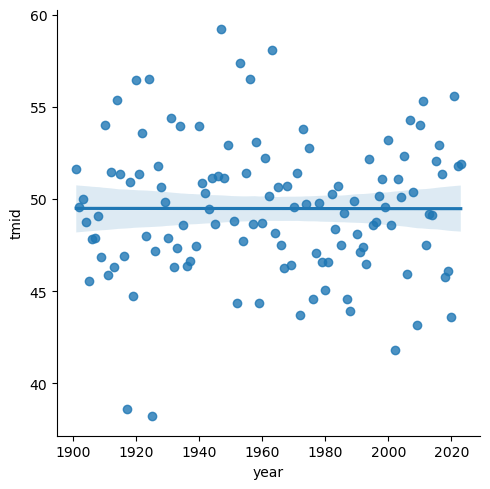

In [115]:
sns.lmplot(x="year", y="tmid", data=oct_yearly)

corr_tmid_year, p = pearsonr(oct_yearly.tmid, oct_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [116]:
x = oct_61_23_yearly.year - 1961
y = oct_61_23_yearly.tmid
n = len(oct_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for October has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for October " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - oct_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(oct_baseline_tmid, 1)))

slope b1 is 0.0139
intercept b0 is 48.809

T-Mid for October has been increasing by 0.0139 deg. F per year since 1961

Predicted T-Mid for October 2024 is 49.7 deg. F, which is -0.1 deg. F above 1901-1960 baseline of 49.7


Correlation coefficient = 0.0768
p-value = 0.5494477551


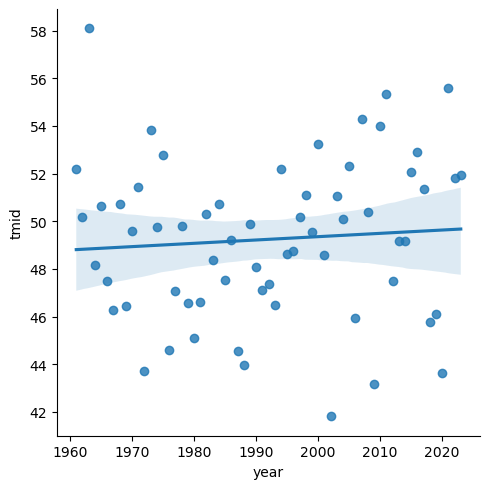

In [117]:
sns.lmplot(x="year", y="tmid", data=oct_61_23_yearly)

corr_tmid_year, p = pearsonr(oct_61_23_yearly.tmid, oct_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 10)))

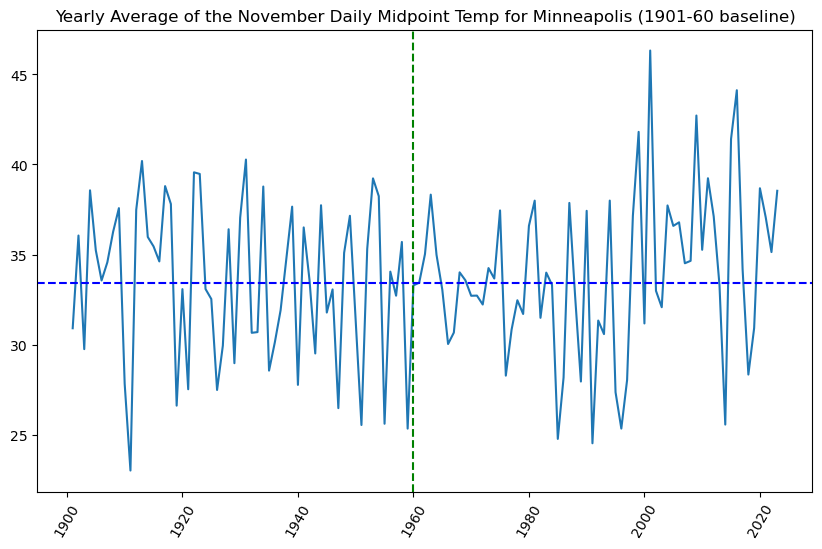

<Figure size 640x480 with 0 Axes>

In [118]:
plt.figure(figsize = (10,6))
plt.plot(nov_yearly['year'], nov_yearly['tmid'])
plt.axhline(nov_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the November Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [119]:
x = nov_yearly.year - 1901
y = nov_yearly.tmid
n = len(nov_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for November has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0111
intercept b0 is 33.019

T-Mid for November has been increasing by 0.0111 deg. F per year since 1901


Correlation coefficient = 0.0881
p-value = 0.3364


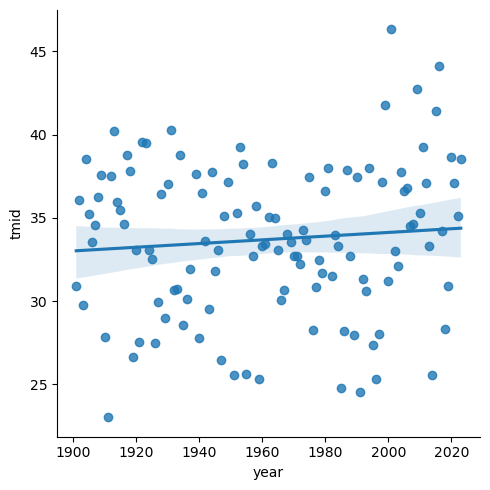

In [120]:
sns.lmplot(x="year", y="tmid", data=nov_yearly)

corr_tmid_year, p = pearsonr(nov_yearly.tmid, nov_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [121]:
x = nov_61_23_yearly.year - 1961
y = nov_61_23_yearly.tmid
n = len(nov_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for November has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for November " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - nov_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(nov_baseline_tmid, 1)))

slope b1 is 0.0596
intercept b0 is 32.122

T-Mid for November has been increasing by 0.0596 deg. F per year since 1961

Predicted T-Mid for November 2024 is 35.9 deg. F, which is 2.5 deg. F above 1901-1960 baseline of 33.4


Correlation coefficient = 0.2374
p-value = 0.061


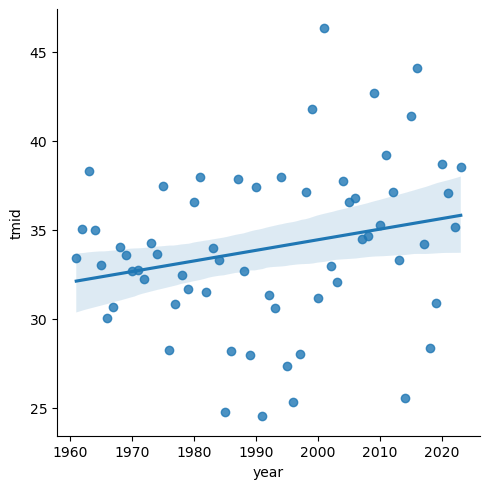

In [122]:
sns.lmplot(x="year", y="tmid", data=nov_61_23_yearly)

corr_tmid_year, p = pearsonr(nov_61_23_yearly.tmid, nov_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

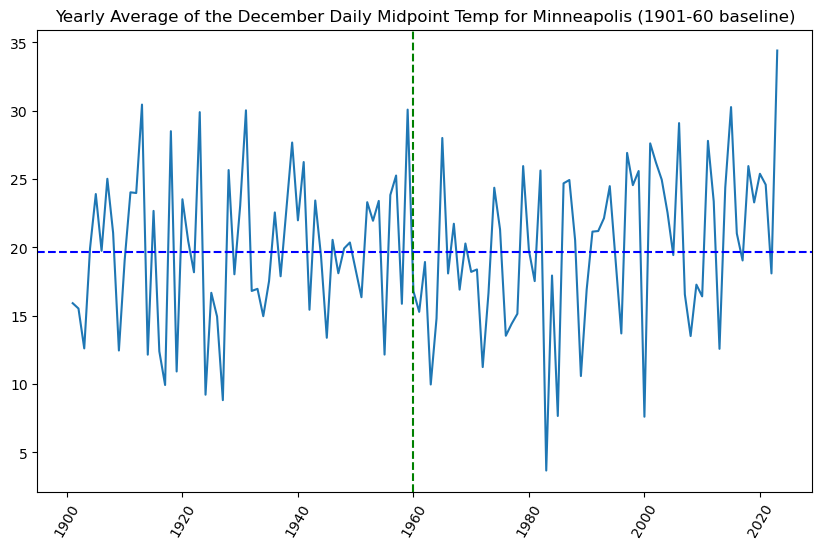

<Figure size 640x480 with 0 Axes>

In [123]:
plt.figure(figsize = (10,6))
plt.plot(dec_yearly['year'], dec_yearly['tmid'])
plt.axhline(dec_baseline_tmid, color = 'b', linestyle='dashed')
plt.axvline(1960, color = 'g', linestyle='dashed')
plt.title("Yearly Average of the December Daily Midpoint Temp for Minneapolis (1901-60 baseline)")
plt.xticks(rotation=60)
plt.show()
plt.clf()

In [124]:
x = dec_yearly.year - 1901
y = dec_yearly.tmid
n = len(dec_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for December has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1901")

slope b1 is 0.0246
intercept b0 is 18.359

T-Mid for December has been increasing by 0.0246 deg. F per year since 1901


Correlation coefficient = 0.1523
p-value = 0.0954


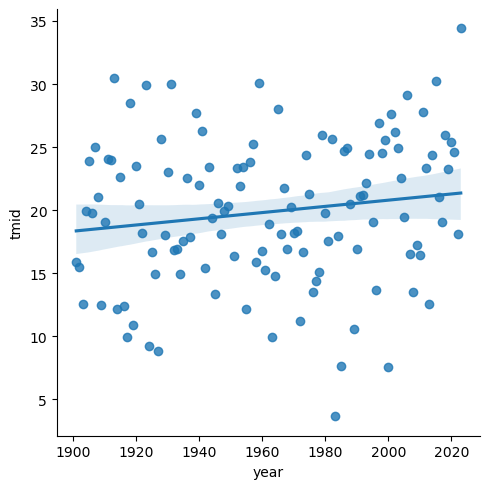

In [125]:
sns.lmplot(x="year", y="tmid", data=dec_yearly)

corr_tmid_year, p = pearsonr(dec_yearly.tmid, dec_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [126]:
x = dec_61_23_yearly.year - 1961
y = dec_61_23_yearly.tmid
n = len(dec_61_23_yearly)

x_mean = np.mean(x) 
y_mean = np.mean(y)
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 

print('slope b1 is', round(b1, 4)) 
print('intercept b0 is', round(b0, 3)) 
print('')
print("T-Mid for December has been increasing by " + str(round(b1, 4)) + " deg. F per year since 1961")
print('')

year_predict = 2024
T_predict = b0 + (year_predict - 1961) * b1

print("Predicted T-Mid for December " + str(year_predict)  + " is " 
      + str(round(T_predict, 1)) + " deg. F, which is "
      + str(round(T_predict - dec_baseline_tmid, 1)) + " deg. F above 1901-1960 baseline of " 
      + str(round(dec_baseline_tmid, 1)))

slope b1 is 0.1166
intercept b0 is 16.434

T-Mid for December has been increasing by 0.1166 deg. F per year since 1961

Predicted T-Mid for December 2024 is 23.8 deg. F, which is 4.1 deg. F above 1901-1960 baseline of 19.7


Correlation coefficient = 0.3545
p-value = 0.0044


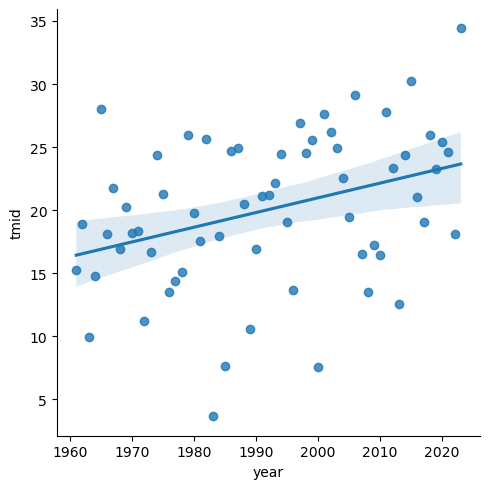

In [127]:
sns.lmplot(x="year", y="tmid", data=dec_61_23_yearly)

corr_tmid_year, p = pearsonr(dec_61_23_yearly.tmid, dec_61_23_yearly.year)

print('Correlation coefficient = ' + str(round(corr_tmid_year, 4)))
print('p-value = ' + str(round(p, 4)))

In [128]:
minny_alltime.head()

,level_0,index,date,tmax,tmin,tmid,year,month,day
0,0,0,1901-01-01,10.04,-4.00,3.02,1901,1,1
1,1,1,1901-01-02,3.92,-13.00,-4.54,1901,1,2
2,2,2,1901-01-03,26.96,3.92,15.44,1901,1,3
3,3,3,1901-01-04,17.06,8.96,13.01,1901,1,4
4,4,4,1901-01-05,21.02,1.94,11.48,1901,1,5


In [129]:
minny_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44195 entries, 0 to 44194
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  44195 non-null  int64  
 1   index    44195 non-null  int64  
 2   date     44195 non-null  object 
 3   tmax     44195 non-null  float64
 4   tmin     44195 non-null  float64
 5   tmid     44195 non-null  float64
 6   year     44195 non-null  int32  
 7   month    44195 non-null  int32  
 8   day      44195 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(1)
memory usage: 2.5+ MB


In [130]:
feb6 = feb[feb['day'] == 6]
feb7 = feb[feb['day'] == 7]
feb8 = feb[feb['day'] == 8]

In [131]:
feb6_max = feb6.tmax.max()
feb6_tmax_row = feb6.loc[feb6['tmax'] == feb6_max] 
feb6_tmax_year = feb6_tmax_row.year

feb6_tmin_max = feb6.tmin.max()
feb6_tmin_max_row = feb6.loc[feb6['tmin'] == feb6_tmin_max]
feb6_tmin_max_year = feb6_tmin_max_row.year

feb6_min = feb6.tmin.min()
feb6_tmin_row = feb6.loc[feb6['tmin'] == feb6_min] 
feb6_tmin_year = feb6_tmin_row.year

In [132]:
print('The record high for Feb. 6 was ' + str(round(feb6_max, 1)) + ' deg. F in ' 
      + feb6_tmax_year.to_string(index=False))
print('')
print('The record highest T-min for Feb. 6 is ' + str(round(feb6_tmin_max, 1)) + ' deg. F in '
      + feb6_tmin_max_year.to_string(index=False))
print('')
print('The record low for Feb. 6 is ' + str(round(feb6_min, 1)) + ' deg. F in '
      + feb6_tmin_year.to_string(index=False))

The record high for Feb. 6 was 51.1 deg. F in 1925

The record highest T-min for Feb. 6 is 34.0 deg. F in 1925

The record low for Feb. 6 is -24.0 deg. F in 1936


In [133]:
feb7_max = feb7.tmax.max()
feb7_tmax_row = feb7.loc[feb7['tmax'] == feb7_max] 
feb7_tmax_year = feb7_tmax_row.year

feb7_tmin_max = feb7.tmin.max()
feb7_tmin_max_row = feb7.loc[feb7['tmin'] == feb7_tmin_max]
feb7_tmin_max_year = feb7_tmin_max_row.year

feb7_min = feb7.tmin.min()
feb7_tmin_row = feb7.loc[feb7['tmin'] == feb7_min] 
feb7_tmin_year = feb7_tmin_row.year

In [134]:
print('The record high for Feb. 7 is ' + str(round(feb7_max, 1)) + ' deg. F in ' 
      + feb7_tmax_year.to_string(index=False))
print('')
print('The record highest T-min for Feb. 7 is ' + str(round(feb7_tmin_max, 1)) + ' deg. F in '
      + feb7_tmin_max_year.to_string(index=False))
print('')
print('The record low for Feb. 7 is ' + str(round(feb7_min, 1)) + ' deg. F in '
      + feb7_tmin_year.to_string(index=False))

The record high for Feb. 7 is 53.1 deg. F in 1987

The record highest T-min for Feb. 7 is 36.0 deg. F in 1925

The record low for Feb. 7 is -24.0 deg. F in 1972


In [135]:
feb8_max = feb8.tmax.max()
feb8_tmax_row = feb8.loc[feb8['tmax'] == feb8_max] 
feb8_tmax_year = feb8_tmax_row.year

feb8_tmin_max = feb8.tmin.max()
feb8_tmin_max_row = feb8.loc[feb8['tmin'] == feb8_tmin_max]
feb8_tmin_max_year = feb8_tmin_max_row.year


feb8_min = feb8.tmin.min()
feb8_tmin_row = feb8.loc[feb8['tmin'] == feb8_min] 
feb8_tmin_year = feb8_tmin_row.year

In [136]:
print('The record high for Feb. 8 is ' + str(round(feb8_max, 1)) + ' deg. F in ' 
      + feb8_tmax_year.to_string(index=False))
print('')
print('The record highest T-min for Feb. 8 is ' + str(round(feb8_tmin_max, 1)) + ' deg. F in '
      + feb8_tmin_max_year.to_string(index=False))
print('')
print('The record low for Feb. 8 is ' + str(round(feb8_min, 1)) + ' deg. F in '
      + feb8_tmin_year.to_string(index=False))

The record high for Feb. 8 is 50.0 deg. F in 1991
2002

The record highest T-min for Feb. 8 is 36.0 deg. F in 1966

The record low for Feb. 8 is -27.9 deg. F in 1933
